# Mount disk

In [1]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/9. Rocking bridge pier

/content/drive/MyDrive/Colab Notebooks/9. Rocking bridge pier


# Import packages

In [3]:
# pip install jupyter_contrib_nbextensions

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random as python_random
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import time

import datetime

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 

plt.rcParams['figure.facecolor'] = 'white'

# Pretty display of variables
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["font.family"] = "Times New Roman"

# Import data

In [5]:
# paste the path here and read the data
dataset_orig1 = pd.read_excel('Data/Summary_for_Tadesse.xlsx', sheet_name = 'data')
# dataset_orig1 = pd.read_excel('Data/Summary_for_Tadesse.xlsx', sheet_name = 'without_outliers')

dataset_orig1.tail(3)
dataset_orig1.head(3)

dc     tc   dc/tc  ...    k_ret  strength_r  res_drift_tot
18222  1828.8  44.45  41.143  ...  0.95003      65.257        0.18974
18223  1828.8  44.45  41.143  ...  0.91794      68.397        0.55422
18224  1828.8  44.45  41.143  ...  0.89583      58.655        1.31450

[3 rows x 18 columns]

dc      tc   dc/tc  ...   k_ret  strength_r  res_drift_tot
0  762.0  11.125  68.493  ...  1.0144      94.264       0.003456
1  762.0  11.125  68.493  ...  1.0096      92.775       0.005968
2  762.0  11.125  68.493  ...  1.0029      90.033       0.011234

[3 rows x 18 columns]

In [6]:
# dataset_orig1[dataset_orig1['DelY/hc (tot)']>1].shape

# plt.scatter(range(0,dataset_orig1.shape[0]), dataset_orig1['DelY/hc (tot)'])

# Exclude outliers

In [7]:
x1=dataset_orig1[dataset_orig1['res_drift_tot']<20]

x2=x1[x1['k_deg/k_ini']>0]

x3=x2[x2['strength_r']>0]

# # x4=x3[x3['k_ret']>0.5]

# # x3=x2[x2['DelY/hc (tot)']<100]
# x3=x2[x2['DelY/hc (tot)']<0.348]
# # x5.shape

# x4=x3[x3['k_deg/k_ini']!=0]
# # x5=x4[x4['res_drift_tot']>0.00243]

# x4.shape
# # x6.to_excel('data_no_outliers2.xlsx')


dataset_orig1=x3.copy(deep=True)

In [8]:
# # for res_drift_tot replace values greater than 100 by 5

# at = pd.DataFrame(dataset_orig1['res_drift_tot'])
# at[at['res_drift_tot']>5]=5

# dataset_orig1['res_drift_tot']=at
# dataset_orig1[dataset_orig1['res_drift_tot']>5].shape

In [9]:
# dataset_orig1=x4.copy(deep=True)

# Convert the numbers given in % to actual values

In [10]:
dataset_orig1.columns

Index(['dc', 'tc', 'dc/tc', 'hc/dc', 'ebp', 'tbp', 'Apt/Ac', 'P/Ac fy,c',
       'fpt,0/fu', 'AFR0_tot', 'Vup_rigid', 'k_deg/k_ini', 'Vmax/Vup_rigid',
       'ED/ED_y', 'DelY/hc (tot)', 'k_ret', 'strength_r', 'res_drift_tot'],
      dtype='object')

In [11]:
# The following response variables are given in % in the data file

dataset_orig1['res_drift_tot']=0.01*dataset_orig1['res_drift_tot']
dataset_orig1['DelY/hc (tot)']=0.01*dataset_orig1['DelY/hc (tot)']
dataset_orig1['k_deg/k_ini']=0.01*dataset_orig1['k_deg/k_ini']
dataset_orig1['strength_r']=0.01*dataset_orig1['strength_r']

In [12]:
dataset_orig1.to_excel('data_new.xlsx')

# Dataset with response variable

In [13]:
dataset_orig=dataset_orig1[['dc','dc/tc', 'hc/dc', 'Apt/Ac', 'fpt,0/fu','P/Ac fy,c', 'tbp','ebp',
       'res_drift_tot'
       ]]
dataset_orig=dataset_orig.dropna().reset_index(drop=True)
dataset_orig = dataset_orig.reset_index(drop=True)  # reset index

dataset_orig.shape
dataset_orig.tail(3)

(18106, 9)

dc   dc/tc  hc/dc  Apt/Ac  ...  P/Ac fy,c   tbp    ebp  res_drift_tot
18103  1828.8  41.143      6       6  ...       10.0  76.2  152.4       0.001897
18104  1828.8  41.143      6       6  ...       12.5  76.2  152.4       0.005542
18105  1828.8  41.143      6       6  ...       15.0  76.2  152.4       0.013145

[3 rows x 9 columns]

In [14]:
dataset_orig.iloc[:,-1:].describe().T[['min', 'max']]

min       max
res_drift_tot  0.000011  0.033158

In [15]:
# factor_multiply = 1

# # change to percentage as it is very small number

# dataset_orig['ED/ED_y']=factor_multiply*dataset_orig1['ED/ED_y']

# dataset_orig.tail(3)

In [16]:
dataset=dataset_orig.copy(deep=True)
dataset.columns

Index(['dc', 'dc/tc', 'hc/dc', 'Apt/Ac', 'fpt,0/fu', 'P/Ac fy,c', 'tbp', 'ebp',
       'res_drift_tot'],
      dtype='object')

# Normalize

In [17]:
# dataset = dataset_orig

# normalize the inputs with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_minmax = scaler.fit_transform(dataset)  # Normalized input data

dataset_minmax_pd = pd.DataFrame(data = dataset_minmax, # values
             columns = dataset.columns)   # assign the column name of the "dataset" to the column name of the new data

dataset_n = dataset_minmax_pd

# Identify the input and output parameters

In [18]:
# Identify the input features, normalized/standardized dataset is used here
inp = dataset_n.iloc[:,:-1]  # all columns except the last one

# Identify the output
oupt = dataset_n.iloc[:,-1:]  # only the last column

# Final (before feature selection) input and output data

In [19]:
# Final input and output data
# Confirm the input and output and exclude if you would like to exclude some colulmn (s)
drop_col = []
inp_mod = inp.drop(drop_col, axis=1)  # drop some column by column name
# df = dataset.drop(drop_col, axis=1)
oupt_mod = oupt  

# uncomment one of the following to use either the modified data with some columns excluded or the original data
# dfinal = "Modified"
dfinal = "Original"

# Final input and output data
if dfinal == "Original":
    X = inp; Y = oupt  # X: input, Y: output
    df = dataset
elif dfinal == "Modified":
    X = inp_mod; Y = oupt_mod
    df = dataset.drop(drop_col, axis=1)

# X; Y
# X.describe().T; Y.describe().T

# Split the data into train and test data / train, validation, and test

In [20]:
rand=43

from sklearn.model_selection import train_test_split # for splitting the data into train and test datasets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = rand)
x_train, y_train = xtrain.values, ytrain.values.flatten()
x_test, y_test = xtest.values, ytest.values.flatten()

In [21]:
print('Training input dataset shape:', xtrain.shape)
print('Testing input dataset shape:', xtest.shape)
print('Training output dataset shape:', ytrain.shape)
print('Testing output dataset shape:', ytest.shape)

Training input dataset shape: (14484, 8)
Testing input dataset shape: (3622, 8)
Training output dataset shape: (14484, 1)
Testing output dataset shape: (3622, 1)


# Ridge regression

In [22]:
from sklearn.linear_model import Ridge

model=ridge = Ridge(alpha=0.1).fit(x_train, y_train)
#=---------------------------

train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.356
Test R2 = 0.364
Complete dataset R2 = 0.358


# Lasso regression

In [23]:
from sklearn import linear_model

model=lasso= linear_model.Lasso(alpha=0.001).fit(x_train, y_train)
#=---------------------------

train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.353
Test R2 = 0.359
Complete dataset R2 = 0.354


# Elastic net

In [24]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

model=elasticnet= ElasticNet(alpha=0.001, l1_ratio=0.5).fit(x_train, y_train)
#=---------------------------

train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.355
Test R2 = 0.363
Complete dataset R2 = 0.357


# KNeighborsRegressor

In [25]:
from sklearn import neighbors
model = kNN = neighbors.KNeighborsRegressor(leaf_size=4, n_neighbors=5).fit(x_train, y_train)
#=---------------------------

train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.873
Test R2 = 0.846
Complete dataset R2 = 0.867


# Support vector machines in Sklearn

In [26]:
# Support vector machine
from sklearn import svm
from sklearn.svm import SVR

#=========== previously tuned 
model=regr_svm = SVR(C=5, 
               epsilon=0.01, 
               gamma='scale',
               kernel='rbf').fit(x_train, y_train)
#=---------------------------

train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.958
Test R2 = 0.957
Complete dataset R2 = 0.958


# [Decision Tree Regression](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)

In [27]:
#-------------------------------------------------------
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
rand=0

model=regr_DT=DecisionTreeRegressor(max_depth=14, 
                                    # min_samples_split=2, 
                                    max_features=8, 
                                    random_state=rand).fit(x_train, y_train)

# model=regr_DT=DecisionTreeRegressor(random_state=rand).fit(x_train, y_train)
#--------------------------------------------------------------------------
train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 1.0
Test R2 = 0.982
Complete dataset R2 = 0.996


# [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)



In [28]:
from sklearn.ensemble import RandomForestRegressor

rand=0
#--------------------------------------------------------------------------
model=regr_rf = RandomForestRegressor(n_estimators=50,
                                max_depth=14, 
                                max_features=7,
                                # min_samples_split=2,
                                random_state=rand
                                ).fit(x_train, y_train)

#--------------------------------------------------------------------------
train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.997
Test R2 = 0.991
Complete dataset R2 = 0.996


# Gradent Boosting Regressor

In [29]:
from sklearn.ensemble import GradientBoostingRegressor
rand=0
#-------------------------------------------------------------------------
model=regr_GBR = GradientBoostingRegressor(
    n_estimators=100,
    max_depth=8,
    learning_rate=0.08,  
    subsample=0.9,
    max_features=8,  
    random_state=rand).fit(x_train, y_train)

#-------------------------------------------------------------------------
train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X))
print('Train R2 = '+str(round(train_R2,3)))
print('Test R2 = '+str(round(test_R2,3)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.996
Test R2 = 0.991
Complete dataset R2 = 0.995


# [Extreme Gradient Boosting-xgb](https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/)
XGBoost

In [30]:
from xgboost import XGBRegressor
rand=0

model=regr_XGB = XGBRegressor(
    n_estimators=324,
    max_depth=11,
    learning_rate=0.17,
    subsample=0.9,
    colsample_bylevel=0.9+0.1,
    colsample_bynode=0.9+0.1,
    colsample_bytree=0.9+0.1,
    objective = "reg:squarederror",
    random_state=rand).fit(x_train, y_train)

#--------------------------------------------------------------------------
train_R2=r2_score(y_train, model.predict(x_train))
test_R2=r2_score(y_test, model.predict(x_test))
complete_R2=r2_score(Y, model.predict(X.values))
print('Train R2 = '+str(round(train_R2,4)))
print('Test R2 = '+str(round(test_R2,4)))
print('Complete dataset R2 = '+str(round(complete_R2,3)))

Train R2 = 0.9999
Test R2 = 0.9949
Complete dataset R2 = 0.999


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


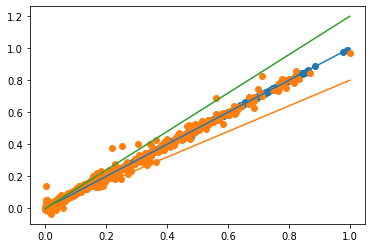

In [31]:
plt.scatter(y_train, model.predict(x_train))
plt.scatter(y_test, model.predict(x_test))
plt.plot([0,1], [0,1])
plt.plot([0,1.0], [0,0.8])
plt.plot([0,1.0], [0,1.2])


# Evaluation of all models

In [32]:
models_all = [
             ridge, lasso, elasticnet,
    
              kNN,
#               KRR,
              regr_svm,
              # ANN,
              regr_DT,
              regr_rf,
              # regr_ET, 
#               regr_ADB,
              # regr_LGB,
              regr_GBR,
              regr_XGB,
#               regr_ngb,
              # ensemble
             ]

predictions_test=[]
predictions_train=[]
predictions_all = []

yy = dataset.iloc[:,-1:].values # observed values

for i in range(0,len(models_all)):
    model=models_all[i]
    # predict and invert
    predictions_train.append(yy.min()+(yy.max()-yy.min()) *model.predict(x_train)) 
    predictions_test.append(yy.min()+(yy.max()-yy.min()) *model.predict(x_test))
    predictions_all.append(yy.min()+(yy.max()-yy.min()) *model.predict(X.values))  

# convert to Pandas
predictions_test_pd1 = pd.DataFrame(predictions_test).T 
predictions_train_pd1 = pd.DataFrame(predictions_train).T 
predictions_all_pd1 = pd.DataFrame(predictions_all).T

# col = ["SVR", 'ANN','CART', "RFR", "ETR", "ADB", "LGB", 'GBR','xgBoost',"Stacking"]
col = ['RR', 'LR', 'EN', 'kNN', "SVR", 'CART', "RF", 'GBT','xgBoost']
predictions_test_pd = pd.DataFrame(data=predictions_test_pd1.values, columns=col)
predictions_train_pd = pd.DataFrame(data=predictions_train_pd1.values, columns=col)
predictions_all_pd = pd.DataFrame(data=predictions_all_pd1.values, columns=col)

In [33]:
# change negative respones to zero for ensemble models
for model in ['RF', 'GBT', 'xgBoost']:
  predictions_all_pd[predictions_all_pd[model]<0]=0
  predictions_test_pd[predictions_test_pd[model]<0]=0
  predictions_train_pd[predictions_train_pd[model]<0]=0

In [34]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred))))

## [SCOTPY](https://spotpy.readthedocs.io/en/latest/)

In [35]:
pip install spotpy


     |████████████████████████████████| 186 kB 14.4 MB/s 


In [36]:
import spotpy
from spotpy import objectivefunctions as of

In [37]:
# Evaluation of the models
# from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

In [38]:
# Mean bias error
# mbe= np.mean(data_predicted - data_true) #here we calculate MBE

## Test dataset

In [39]:
# test dataset
ytest_orig = yy.min()+(yy.max()-yy.min()) *ytest

In [40]:
# result_test = []
# for i in range(1,predictions_test_pd.shape[1]+1):
#     x=predictions_test_pd.iloc[:,i-1]
#     MSE = mean_squared_error(ytest_orig, x, squared=True) # If True returns MSE value, if False returns RMSE value
#     RMSE = mean_squared_error(ytest_orig, x, squared=False)
#     R2 = round(100*r2_score(ytest_orig, x, multioutput='variance_weighted'),1)
        
#     MAPE = 100*mape(ytest_orig, x) # in percentage
#     # MAE = mae(ytest_orig, x)
    
#     result_test.append([MAE, MAPE, MSE, RMSE, R2])
# #     result_test.append([RMSE, MAE,R2])
# #     pd.DataFrame([dataset.columns[i], MAPE*100,RMSE, MAE]).T

In [41]:
result_test = []
for i in range(1,predictions_test_pd.shape[1]+1):    
    observed=ytest_orig.T.values.flatten()
    pred=predictions_test_pd.iloc[:,i-1].values.flatten()
    # using scikit
    MSE=mean_squared_error(observed, pred, squared=True) # If True returns MSE value, if False returns RMSE value
    RMSE = mean_squared_error(observed, pred, squared=False)
    R2 = round(100*r2_score(observed, pred, multioutput='variance_weighted'),1)
    MAE = mae(observed, pred)

    MAPE = 100*mape(observed, pred) # in percentage

    # using scotpy
    # MAPE = 100*of.kge(x,y) # in percentage
    AI = of.agreementindex(observed, pred) # agreement index
    kge = of.kge(observed, pred) # Kling-Gupta efficiency
    
    result_test.append([MAE, MAPE, MSE, RMSE, R2, AI, kge])


result_test_pd1 = pd.DataFrame(result_test).T
result_test_pd = pd.DataFrame(data=result_test_pd1.values,columns=col).T
# results_pd.(columns=dataset.columns)
# result_test_pd.columns = ['MAPE', 'RMSE', 'MAE']
result_test_pd.columns = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AI', 'KGE']
result_test_pd

MAE         MAPE           MSE  ...    R2        AI       KGE
RR       0.001989  1211.107559  1.006482e-05  ...  36.9  0.700720  0.420896
LR       0.001921  1085.556640  1.015600e-05  ...  36.3  0.679631  0.383862
EN       0.001951  1141.844630  1.009892e-05  ...  36.6  0.689987  0.401178
kNN      0.000509    27.671131  2.452131e-06  ...  84.6  0.950829  0.766482
SVR      0.000385   169.604856  6.791951e-07  ...  95.7  0.989281  0.975675
CART     0.000146    32.161794  2.846523e-07  ...  98.2  0.995571  0.982396
RF       0.000118    22.648561  1.494049e-07  ...  99.1  0.997644  0.992686
GBT      0.000127    28.033995  1.246140e-07  ...  99.2  0.998030  0.992295
xgBoost  0.000093    28.167907  7.974373e-08  ...  99.5  0.998750  0.991556

[9 rows x 7 columns]

## Train dataset

In [42]:
# train dataset
ytrain_orig = yy.min()+(yy.max()-yy.min()) *ytrain

In [43]:
# result_train = []
# for i in range(1,predictions_train_pd.shape[1]+1):
#     x=predictions_train_pd.iloc[:,i-1]
#     MSE = mean_squared_error(ytrain_orig, x, squared=True) # If True returns MSE value, if False returns RMSE value
#     RMSE = mean_squared_error(ytrain_orig, x, squared=False)
#     R2 = round(100*r2_score(ytrain_orig, x, multioutput='variance_weighted'),1)
#     MAPE = 100*mape(ytrain_orig, x) # in percentage
#     MAE = mae(ytrain_orig, x)
# #     result_train.append([MAPE, RMSE, MAE])
#     result_train.append([MAE, MAPE, MSE, RMSE, R2])
# #     pd.DataFrame([dataset.columns[i], MAPE*100,RMSE, MAE]).T

In [44]:
result_train = []
for i in range(1,predictions_test_pd.shape[1]+1):    
    observed=ytrain_orig.T.values.flatten()
    pred=predictions_train_pd.iloc[:,i-1].values.flatten()
    # using scikit
    MSE=mean_squared_error(observed, pred, squared=True) # If True returns MSE value, if False returns RMSE value
    RMSE = mean_squared_error(observed, pred, squared=False)
    R2 = round(100*r2_score(observed, pred, multioutput='variance_weighted'),1)
    MAE = mae(observed, pred)
    MAPE = 100*of.kge(observed, pred) # in percentage

    # using scotpy
    # MAPE = 100*of.kge(x,y) # in percentage
    AI = of.agreementindex(observed, pred) # agreement index
    kge = of.kge(observed, pred) # Kling-Gupta efficiency
    
    result_train.append([MAE, MAPE, MSE, RMSE, R2, AI, kge])
#     result_test.append([RMSE, MAE,R2])
#     pd.DataFrame([dataset.columns[i], MAPE*100,RMSE, MAE]).T

result_train_pd1 = pd.DataFrame(result_train).T
result_train_pd = pd.DataFrame(data=result_train_pd1.values,columns=col).T
# results_pd.(columns=dataset.columns)
# result_train_pd.columns = ['MAPE', 'RMSE', 'MAE']
result_train_pd.columns = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AI', 'KGE']
result_train_pd


MAE       MAPE           MSE      RMSE     R2        AI       KGE
RR       0.001992  42.965839  9.650713e-06  0.003107   35.8  0.701936  0.429658
LR       0.001923  39.184876  9.711294e-06  0.003116   35.4  0.681179  0.391849
EN       0.001953  40.945554  9.670600e-06  0.003110   35.6  0.691291  0.409456
kNN      0.000439  82.290398  1.911197e-06  0.001382   87.3  0.961379  0.822904
SVR      0.000346  96.471607  6.377471e-07  0.000799   95.8  0.988970  0.964716
CART     0.000012  99.969386  2.116908e-09  0.000046  100.0  0.999965  0.999694
RF       0.000056  99.223103  4.608646e-08  0.000215   99.7  0.999227  0.992231
GBT      0.000089  99.216657  6.127472e-08  0.000248   99.6  0.998972  0.992167
xgBoost  0.000022  99.962943  1.552594e-09  0.000039  100.0  0.999974  0.999629

## Complete dataset

In [45]:
# # from sklearn.metrics import mean_absolute_percentage_error as mape

# result_all = []
# for i in range(1,predictions_all_pd.shape[1]+1):
#     x=predictions_all_pd.iloc[:,i-1]
#     MSE = mean_squared_error(yy, x, squared=True) # If True returns MSE value, if False returns RMSE value
#     RMSE = mean_squared_error(yy, x, squared=False)
#     R2 = round(100*r2_score(yy, x, multioutput='variance_weighted'),2)
#     MAPE = 100*mape(yy, x)
#     MAE = mae(yy, x)
# #     result_all.append([MAPE, RMSE, MAE])
#     result_all.append([MAE, MAPE, MSE, RMSE, R2])
# #     pd.DataFrame([dataset.columns[i], MAPE*100,RMSE, MAE]).T

In [46]:
result_all = []
for i in range(1,predictions_test_pd.shape[1]+1):    
    observed=yy.flatten()
    pred=predictions_all_pd.iloc[:,i-1].values.flatten()
    # using scikit
    MSE=mean_squared_error(observed, pred, squared=True) # If True returns MSE value, if False returns RMSE value
    RMSE = mean_squared_error(observed, pred, squared=False)
    R2 = round(100*r2_score(observed, pred, multioutput='variance_weighted'),1)
    MAE = mae(observed, pred)
    MAPE = 100*of.kge(observed, pred) # in percentage

    # using scotpy
    # MAPE = 100*of.kge(x,y) # in percentage
    AI = of.agreementindex(observed, pred) # agreement index
    kge = of.kge(observed, pred) # Kling-Gupta efficiency
    
    result_all.append([MAE, MAPE, MSE, RMSE, R2, AI, kge])
#     result_test.append([RMSE, MAE,R2])
#     pd.DataFrame([dataset.columns[i], MAPE*100,RMSE, MAE]).T

result_all_pd1 = pd.DataFrame(result_all).T
result_all_pd = pd.DataFrame(data=result_all_pd1.values,columns=col).T
# results_pd.(columns=dataset.columns)
result_all_pd.columns = ['MAE', 'MAPE', 'MSE', 'RMSE', 'R2', 'AI', 'KGE']
result_all_pd


MAE       MAPE           MSE      RMSE    R2        AI       KGE
RR       0.001991  42.792405  9.733552e-06  0.003120  36.0  0.701685  0.427924
LR       0.001923  39.027345  9.800255e-06  0.003131  35.6  0.680858  0.390273
EN       0.001953  40.782054  9.756283e-06  0.003124  35.9  0.691021  0.407821
kNN      0.000453  81.157914  2.019407e-06  0.001421  86.7  0.959255  0.811579
SVR      0.000354  96.977293  6.460385e-07  0.000804  95.8  0.989037  0.969773
CART     0.000039  99.641410  5.863647e-08  0.000242  99.6  0.999038  0.996414
RF       0.000068  99.269806  6.675471e-08  0.000258  99.6  0.998894  0.992698
GBT      0.000097  99.238208  7.394538e-08  0.000272  99.5  0.998774  0.992382
xgBoost  0.000036  99.844319  1.719428e-08  0.000131  99.9  0.999717  0.998443

# Export to excel

## Models evaluation

In [47]:
stop here

SyntaxError: ignored

In [ ]:
name = 'res_drift_tot'

In [ ]:
aa = result_test_pd.drop(['MAPE', 'MSE'], axis=1)
a=result_test_pd.copy(deep=True)

aa['RMSE']=round(a['RMSE']*10000, 2)
aa['MAE']=round(a['MAE']*10000,2)
aa['AI']=round(a['AI']*100,2)
aa['KGE']=round(a['KGE']*100,2)

bb = result_train_pd.drop(['MAPE', 'MSE'], axis=1)
b=result_train_pd.copy(deep=True)

bb['RMSE']=round(b['RMSE']*10000, 2)
bb['MAE']=round(b['MAE']*10000,2)
bb['AI']=round(b['AI']*100,2)
bb['KGE']=round(b['KGE']*100,2)

pd.DataFrame(bb.T).to_excel('Evaluation_model_'+name+'_train.xlsx') 
pd.DataFrame(aa.T).to_excel('Evaluation_model_'+name+'_test.xlsx')

# use th following for colab if it is not saving the files to drive by the above command lines
from google.colab import files
files.download('Evaluation_model_'+name+'_train.xlsx')
files.download('Evaluation_model_'+name+'_test.xlsx')

aa.T; bb.T

In [ ]:
# # Model evaluation

# pd.DataFrame(result_train_pd).to_excel(path_result+"/Numeric/Evaluation_model_train.xlsx") 
# pd.DataFrame(result_test_pd).to_excel(path_result+'/Numeric/Evaluation_model_test.xlsx')
# pd.DataFrame(result_all_pd).to_excel(path_result+'/Numeric/Evaluation_model_all_data.xlsx')

# Model evaluation

# pd.DataFrame(result_train_pd).to_excel('Evaluation_model_'+name+'_train.xlsx') 
# pd.DataFrame(result_test_pd).to_excel('Evaluation_model_'+name+'_test.xlsx')
# pd.DataFrame(result_all_pd).to_excel('Evaluation_model_'+name+'_all_data.xlsx')

## Prediction of all models

In [ ]:
#==== original index in case somem rows excluded
predictions_all_pd.index = dataset.index
#===== Add experimental column
PE=predictions_all_pd  # predicted using all models
PE['Experimental']=yy  # add experimental column

#take the exper.column to first/reorder the columns
cols = PE.columns.tolist()
cols = cols[-1:] + cols[:-1]

PE=PE[cols]
# Export to excel

PE.to_excel('PredictedResponseANDExperimental_'+name+'.xlsx') 
# PE.to_excel(path_result+'/Numeric/PredictedResponseANDExperimental.xlsx') 
# pd.concat([dataset, PE], axis=1).to_excel(path_result+'/Numeric/Data+Response.xlsx')
pd.concat([dataset, PE], axis=1).to_excel('Data+Response_'+name+'.xlsx')
PE.tail(3)

# [Radar chart or spider plot](https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals)

# Only test set

## single models

In [61]:
# Minimum and maximum of both train and test performance indices
perf=result_train_pd.describe().T[['min', 'max']]
perf[['min_test', 'max_test']]=result_test_pd.describe().T[['min', 'max']]
perf.T.describe().T[['min', 'max']]

min          max
MAE   1.222380e-05     0.001992
MAPE  2.264856e+01  1211.107559
MSE   1.552594e-09     0.000010
RMSE  3.940297e-05     0.003187
R2    3.540000e+01   100.000000
AI    6.796310e-01     0.999974
KGE   3.838621e-01     0.999694

In [62]:
result_test_mod=result_test_pd.copy(deep=True)
result_test_mod['MAE']=10000*result_test_pd['MAE']
# result_test_mod['MAPE']=result_test_pd['MAPE']
result_test_mod['RMSE']=10000*result_test_pd['RMSE']
result_test_mod['AI']=100*result_test_pd['AI']
result_test_mod['KGE']=100*result_test_pd['KGE']
# Minimum and maximum of performance indices
perf=result_test_mod.describe().T[['min', 'max']]
perf

min          max
MAE   9.282419e-01    19.894013
MAPE  2.264856e+01  1211.107559
MSE   7.974373e-08     0.000010
RMSE  2.823893e+00    31.868478
R2    3.630000e+01    99.500000
AI    6.796310e+01    99.875022
KGE   3.838621e+01    99.268566

In [63]:
# based on the above table
aMAE=0; bMAE=20
# aMAPE=15; bMAPE=510  # remember MAPE is originally in %
aRMSE=0; bRMSE=35
aR2=0; bR2=100
aAI=60; bAI=100
aKGE=35; bKGE=100

# Test set
performance_test = pd.DataFrame((result_test_mod['MAE']-aMAE)/(bMAE-aMAE))
performance_test.columns=['MAE_mod']
# performance_test['MAPE_mod']=(result_test_mod['MAPE']-aMAPE)/(bMAPE-aMAPE)
performance_test['RMSE_mod']=(result_test_mod['RMSE']-aRMSE)/(bRMSE-aRMSE)
performance_test['R2_mod']=(result_test_mod['R2']-aR2)/(bR2-aR2)
performance_test['AI_mod']=(result_test_mod['AI']-aAI)/(bAI-aAI)
performance_test['KGE_mod']=(result_test_mod['KGE']-aKGE)/(bKGE-aKGE)

In [64]:
performance_test

MAE_mod  RMSE_mod  R2_mod    AI_mod   KGE_mod
RR       0.994701  0.906431   0.369  0.251800  0.109071
LR       0.960528  0.910528   0.363  0.199077  0.052096
EN       0.975299  0.907966   0.366  0.224968  0.078735
kNN      0.254458  0.447408   0.846  0.877073  0.640741
SVR      0.192640  0.235467   0.957  0.973202  0.962577
CART     0.072767  0.152437   0.982  0.988928  0.972917
RF       0.059133  0.110437   0.991  0.994109  0.988747
GBT      0.063286  0.100859   0.992  0.995076  0.988146
xgBoost  0.046412  0.080683   0.995  0.996876  0.987010

In [65]:
predictions_train_pd.columns

Index(['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART', 'RF', 'GBT', 'xgBoost'], dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes curr

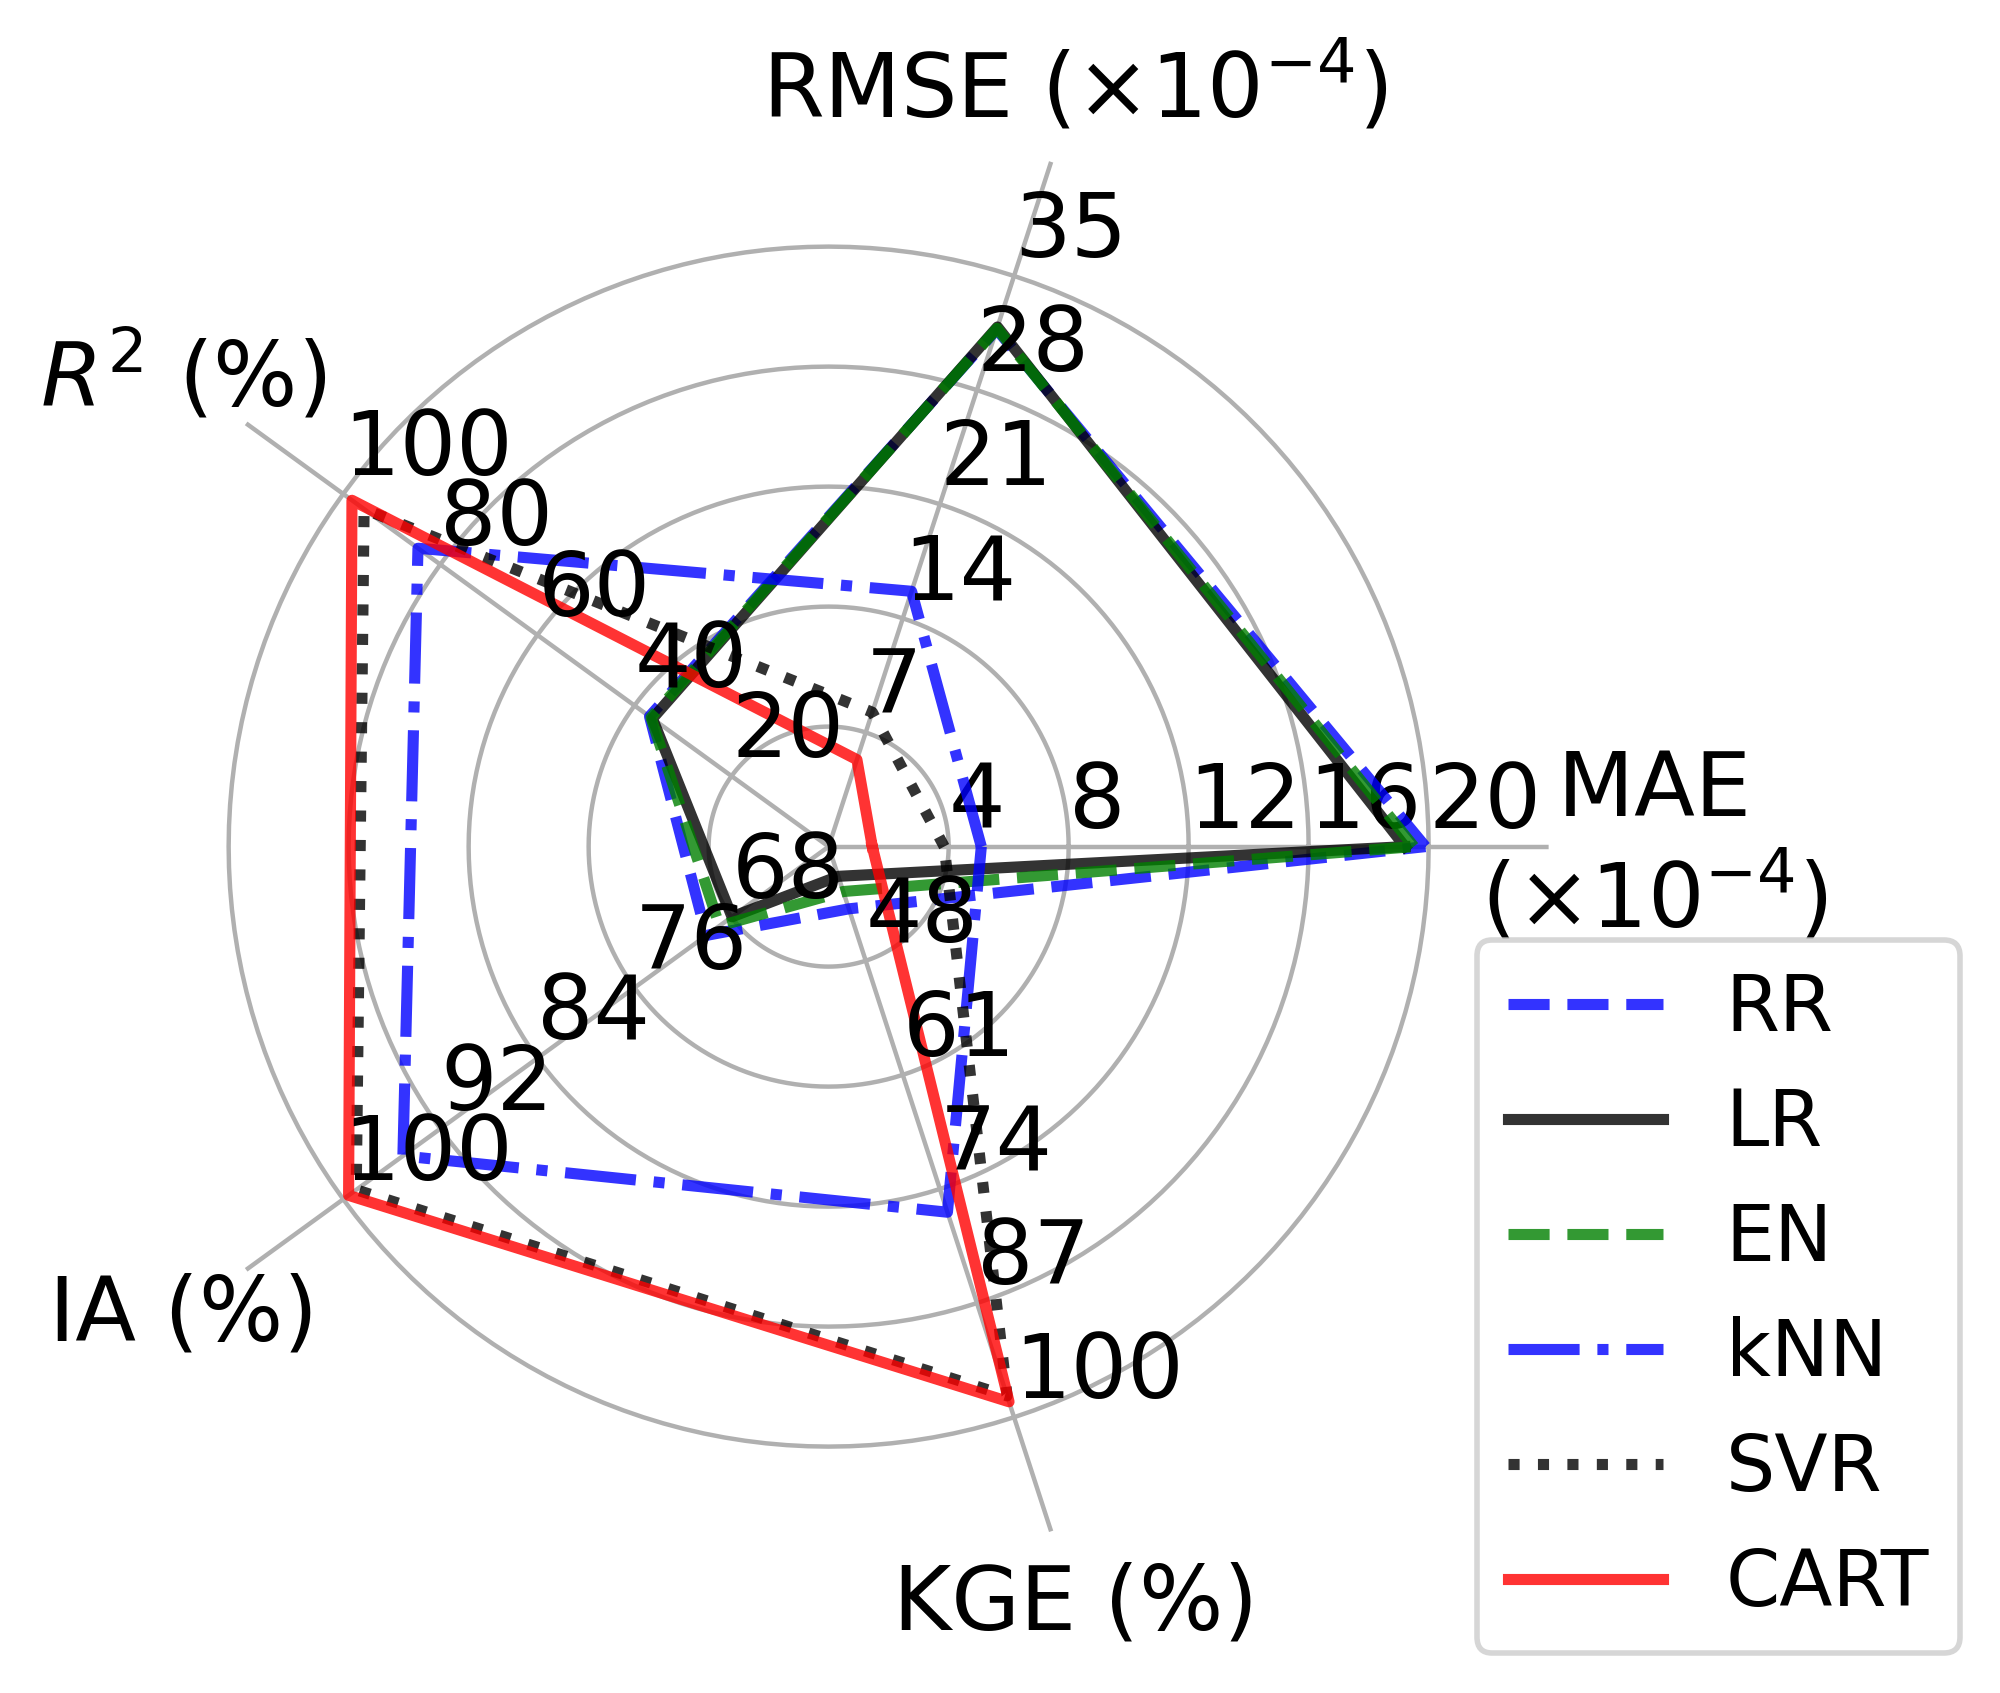

In [66]:
# models=ensemble_models
models=['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART']
num=5 # limit of y-axis 
plt.rcParams['figure.dpi'] = 400
line_stye = ['--', '-', '--','-.',':','-']
line_color = ['blue', 'black', 'green', 'blue', 'black','red']

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=16)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, num+1), angle=angle, labels=label, fontsize=16)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0,num+1)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        

if __name__ == '__main__':
    fig = plt.figure(figsize=(8,8))
    lab = [
        [int(x) for x in np.linspace(start = aMAE+(1/num)*(bMAE-aMAE), stop = bMAE, num = num)],
        # [int(x) for x in np.linspace(start = aMAPE+(1/num)*(bMAPE-aMAPE), stop = bMAPE, num = num)],
        [int(x) for x in np.linspace(start = aRMSE+(1/num)*(bRMSE-aRMSE), stop = bRMSE, num = num)],
        [int(x) for x in np.linspace(start = aR2+(1/num)*(bR2-aR2), stop = bR2, num = num)],
        [int(x) for x in np.linspace(start = aAI+(1/num)*(bAI-aAI), stop = bAI, num = num)],
        [int(x) for x in np.linspace(start = aKGE+(1/num)*(bKGE-aKGE), stop = bKGE, num = num)],
        # list('12345'),
        # list('jklmn'),
    ]
      
    # performance_train1=performance_train*num
    # for i in range(len(models)):
    #     # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE\n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     radar = Radar(fig, tit, lab, rect = [0.0, 0.0, 0.45, 0.45])
    #     model=models[i]
    #     radar.plot(performance_train1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    # # radar.ax.legend(fontsize=15, loc=(1.15,0.5))

    performance_test1=performance_test*num
    for i in range(len(models)):
        # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE \n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (b) Test set'] 
        # tit = ['MAE', 'MAPE'+r'$(\times 10^{-2})$', 'RMSE', r'$R^2$'+' (%)'+'\n (a) Single models'] 

        tit = ['  MAE\n'+'  '+r'$(\times 10^{-4})$', 
              #  'MAPE'+r'$(\times 10^{-2})$', 
               'RMSE '+r'$(\times 10^{-4})$',
               r'$R^2$'+' (%)',
              #  r'$R^2$'+' (%)'+'\n (a) Single models',
              #  'IA \n'+r'$(\times 10^{-2})$', 
              #  'KGE \n'+r'$(\times 10^{-2})$', 

               'IA'+' (%)',
               'KGE'+' (%)',
        ] 
        radar = Radar(fig, tit, lab, rect = [0.35, 0.0, 1.0, 0.45])
        model=models[i]
        radar.plot(performance_test1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    radar.ax.legend(fontsize=14, loc=(0.95,-0.06))
    
plt.savefig('spiderplot1.svg',format='svg', dpi=400,bbox_inches = "tight")

In [ ]:
# # models=ensemble_models
# models=['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART']
# num=5 # limit of y-axis 
# plt.rcParams['figure.dpi'] = 400
# line_stye = ['--', '-', '--','-.',':', '-']
# line_color = ['blue', 'black', 'green', 'blue', 'black', 'red']

# class Radar(object):
#     def __init__(self, figure, title, labels, rect=None):
#         if rect is None:
#             rect = [0.05, 0.05, 0.9, 0.9]

#         self.n = len(title)
#         self.angles = np.arange(0, 360, 360.0/self.n)

#         self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

#         self.ax = self.axes[0]
#         self.ax.set_thetagrids(self.angles, labels=title, fontsize=16)

#         for ax in self.axes[1:]:
#             ax.patch.set_visible(False)
#             ax.grid(False)
#             ax.xaxis.set_visible(False)

#         for ax, angle, label in zip(self.axes, self.angles, labels):
#             ax.set_rgrids(range(1, num+1), angle=angle, labels=label, fontsize=16)
#             ax.spines['polar'].set_visible(False)
#             ax.set_ylim(0,num+1)

#     def plot(self, values, *args, **kw):
#         angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
#         values = np.r_[values, values[0]]
#         self.ax.plot(angle, values, *args, **kw)
        

# if __name__ == '__main__':
#     fig = plt.figure(figsize=(8,8))
#     lab = [
#         [int(x) for x in np.linspace(start = aMAE+(1/num)*(bMAE-aMAE), stop = bMAE, num = num)],
#         [int(x) for x in np.linspace(start = aMAPE+(1/num)*(bMAPE-aMAPE), stop = bMAPE, num = num)],
#         [int(x) for x in np.linspace(start = aRMSE+(1/num)*(bRMSE-aRMSE), stop = bRMSE, num = num)],
#         [int(x) for x in np.linspace(start = aR2+(1/num)*(bR2-aR2), stop = bR2, num = num)]
#         # list('12345'),
#         # list('jklmn'),
#     ]
      
#     # performance_train1=performance_train*num
#     # for i in range(len(models)):
#     #     # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE\n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
#     #     tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
#     #     radar = Radar(fig, tit, lab, rect = [0.0, 0.0, 0.45, 0.45])
#     #     model=models[i]
#     #     radar.plot(performance_train1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
#     # # radar.ax.legend(fontsize=15, loc=(1.15,0.5))

#     performance_test1=performance_test*num
#     for i in range(len(models)):
#         # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE \n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (b) Test set'] 
#         # tit = ['MAE', 'MAPE'+r'$(\times 10^{-2})$', 'RMSE', r'$R^2$'+' (%)'+'\n (a) Single models'] 

#         tit = ['MAE\n'+r'$(\times 10^{-2})$', 
#                'MAPE'+r'$(\times 10^{-2})$', 
#                'RMSE \n'+r'$(\times 10^{-2})$', 
#                r'$R^2$'+' (%)'+'\n (a) Single models'] 
#         radar = Radar(fig, tit, lab, rect = [0.35, 0.0, 1.0, 0.45])
#         model=models[i]
#         radar.plot(performance_test1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
#     radar.ax.legend(fontsize=14, loc=(0.95,-0.06))


## Ensemble models

In [67]:
predictions_all_pd.columns

Index(['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART', 'RF', 'GBT', 'xgBoost'], dtype='object')

In [68]:
ensemble_models=['RF', 'GBT', 'xgBoost']

ens_train = result_train_pd.T[ensemble_models].T
ens_test = result_test_pd.T[ensemble_models].T

# Minimum and maximum of both train and test performance indices
perf=ens_train.describe().T[['min', 'max']]
perf[['min_test', 'max_test']]=ens_test.describe().T[['min', 'max']]
perf.T.describe().T[['min', 'max']]

min           max
MAE   2.167823e-05  1.265728e-04
MAPE  2.264856e+01  9.996294e+01
MSE   1.552594e-09  1.494049e-07
RMSE  3.940297e-05  3.865293e-04
R2    9.910000e+01  1.000000e+02
AI    9.976438e-01  9.999742e-01
KGE   9.915563e-01  9.996294e-01

In [69]:
result_test_mod=result_test_pd.copy(deep=True)
result_test_mod['MAE']=100000*result_test_pd['MAE']
# result_test_mod['MAPE']=result_test_pd['MAPE']
result_test_mod['RMSE']=10000*result_test_pd['RMSE']
result_test_mod['AI']=100*result_test_pd['AI']
result_test_mod['KGE']=100*result_test_pd['KGE']

ensemble_models=['RF', 'GBT', 'xgBoost']

ens_test1 = result_test_mod.T[ensemble_models].T

# Minimum and maximum of both train and test performance indices
perf=ens_test1.describe().T[['min', 'max']]
perf

min           max
MAE   9.282419e+00  1.265728e+01
MAPE  2.264856e+01  2.816791e+01
MSE   7.974373e-08  1.494049e-07
RMSE  2.823893e+00  3.865293e+00
R2    9.910000e+01  9.950000e+01
AI    9.976438e+01  9.987502e+01
KGE   9.915563e+01  9.926857e+01

In [70]:
# based on the above table
aMAE=5; bMAE=15
# aMAPE=15; bMAPE=25
aRMSE=0; bRMSE=4
aR2=95; bR2=100
aAI=95; bAI=100
aKGE=95; bKGE=100

# Test set
performance_test = pd.DataFrame((result_test_mod['MAE']-aMAE)/(bMAE-aMAE))
performance_test.columns=['MAE_mod']
# performance_test['MAPE_mod']=(result_test_mod['MAPE']-aMAPE)/(bMAPE-aMAPE)
performance_test['RMSE_mod']=(result_test_mod['RMSE']-aRMSE)/(bRMSE-aRMSE)
performance_test['R2_mod']=(result_test_mod['R2']-aR2)/(bR2-aR2)
performance_test['AI_mod']=(result_test_mod['AI']-aAI)/(bAI-aAI)
performance_test['KGE_mod']=(result_test_mod['KGE']-aKGE)/(bKGE-aKGE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


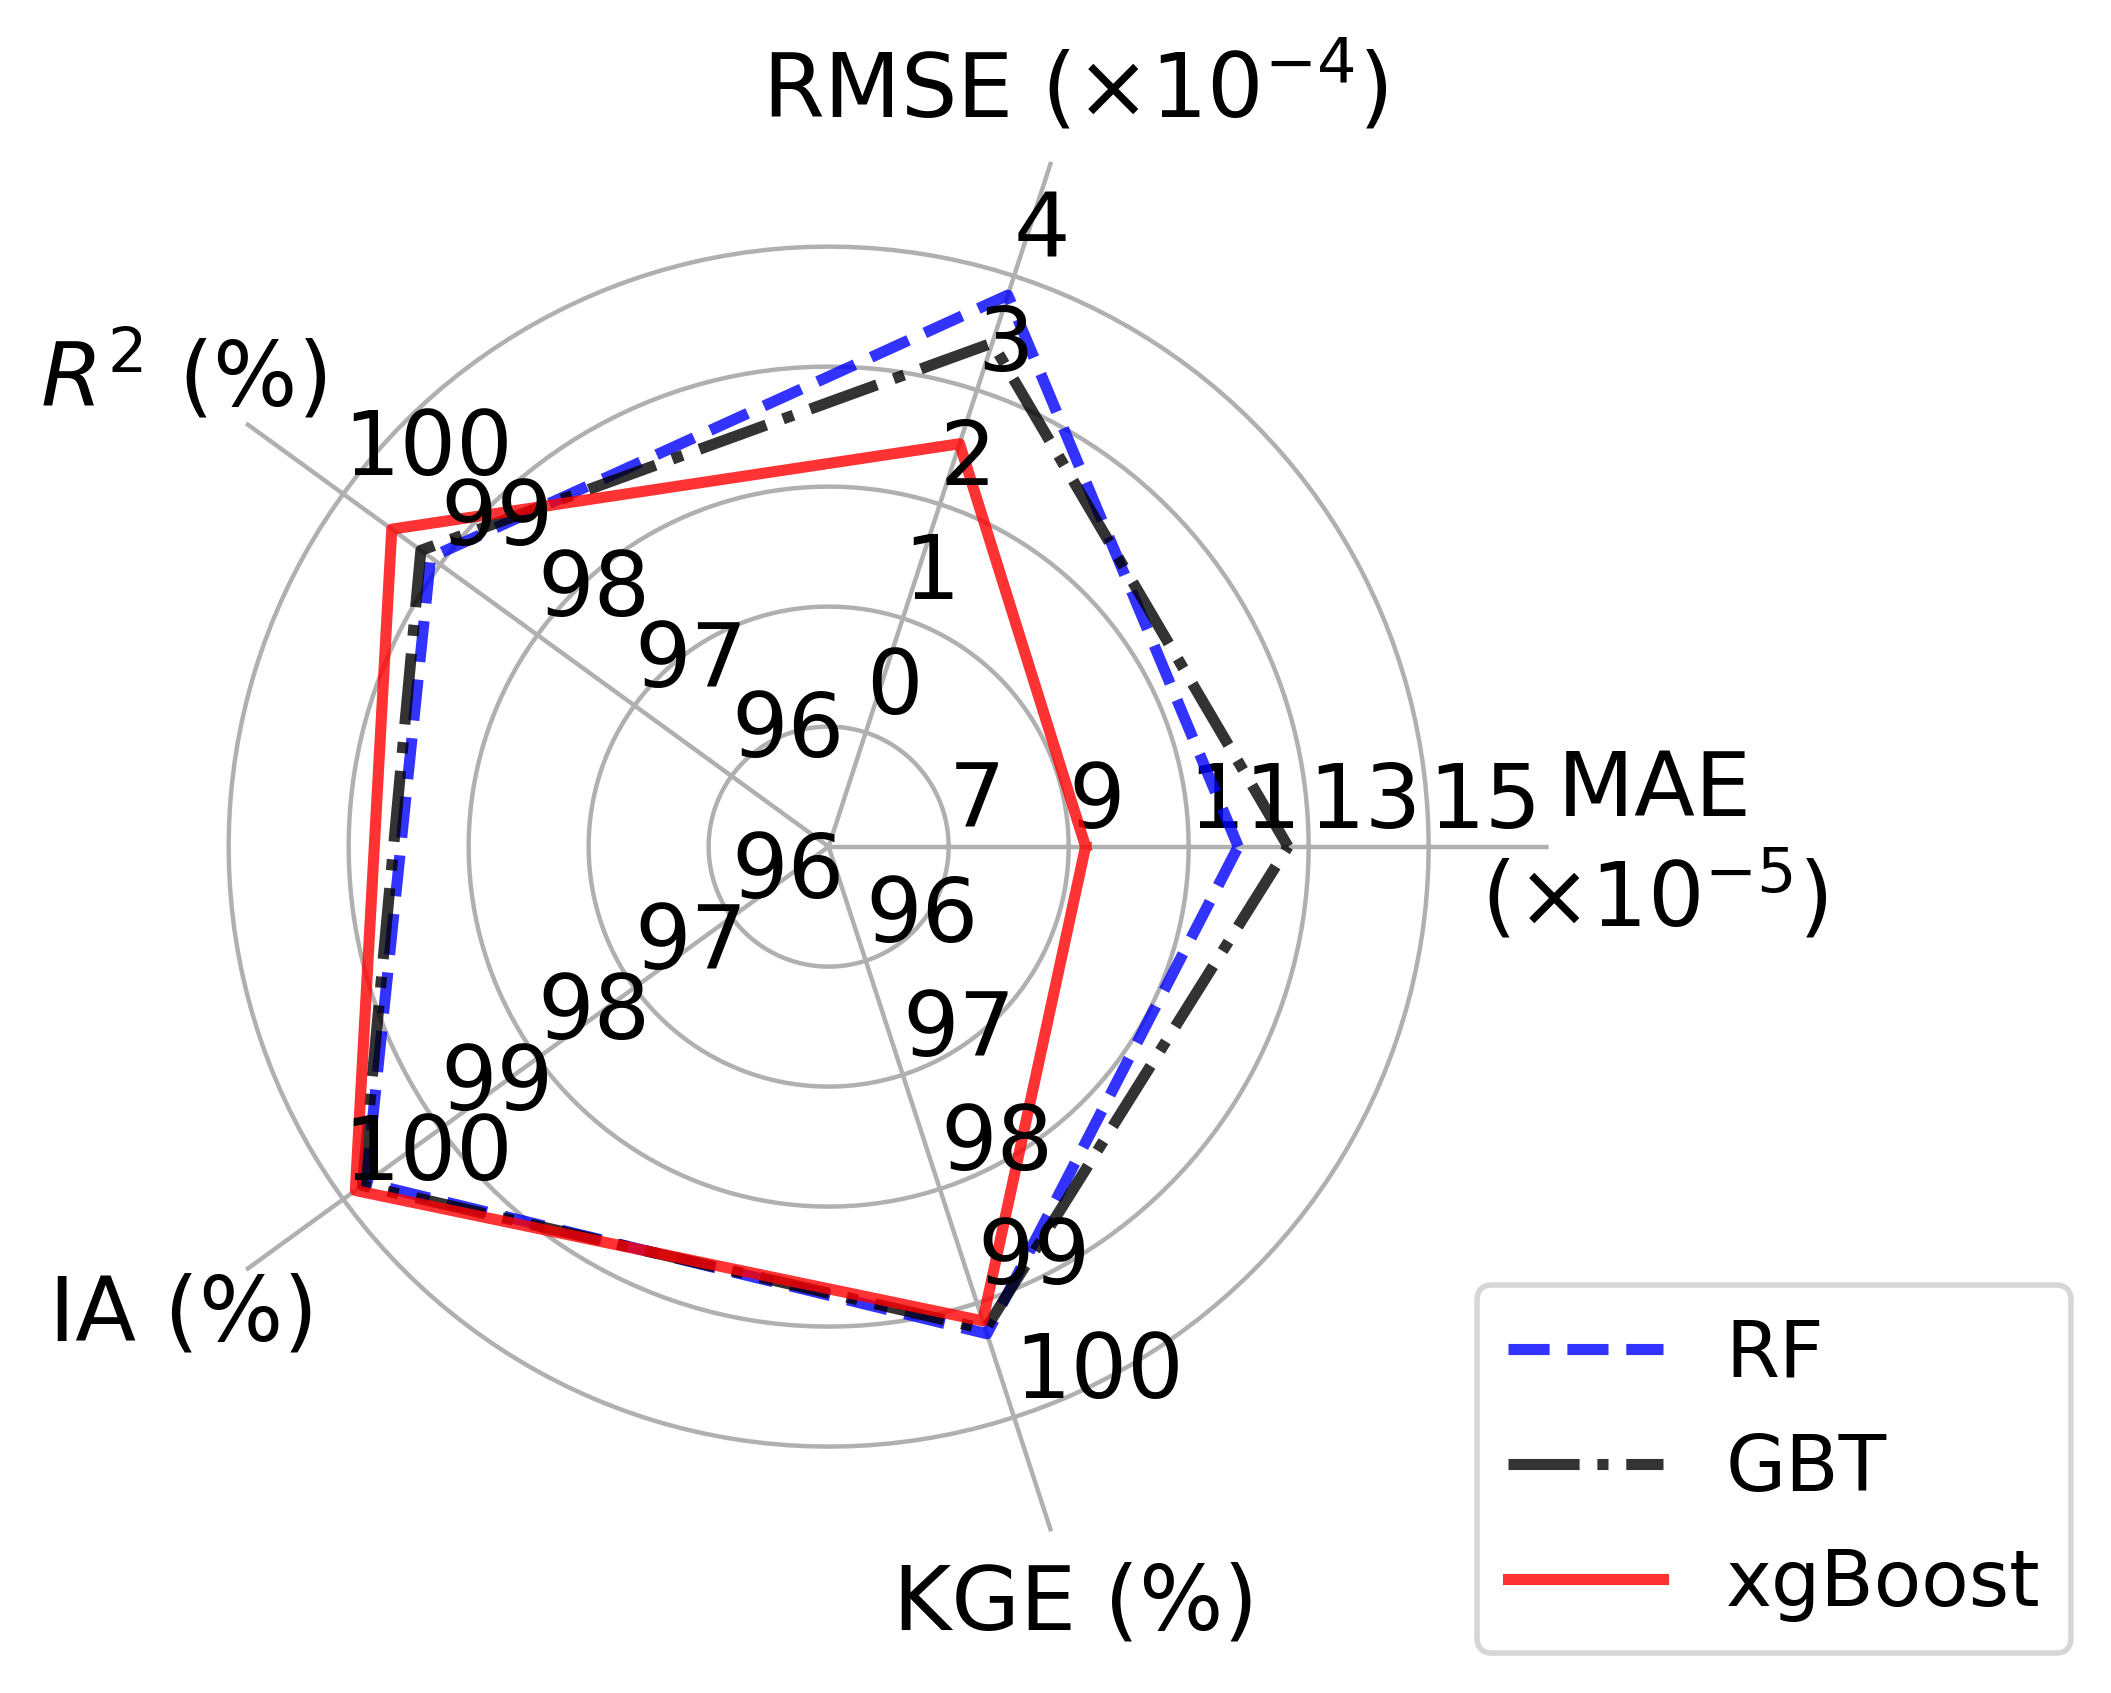

In [71]:
models=ensemble_models
# models=['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART']
num=5 # limit of y-axis 
plt.rcParams['figure.dpi'] = 400
line_stye = ['--', '-.', '-', '-.','--', '-']
line_color = ['blue', 'black', 'red', 'green', 'black', 'red']

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=16)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, num+1), angle=angle, labels=label, fontsize=16)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0,num+1)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        

if __name__ == '__main__':
    fig = plt.figure(figsize=(8,8))
    lab = [
        [int(x) for x in np.linspace(start = aMAE+(1/num)*(bMAE-aMAE), stop = bMAE, num = num)],
        # [int(x) for x in np.linspace(start = aMAPE+(1/num)*(bMAPE-aMAPE), stop = bMAPE, num = num)],
        [int(x) for x in np.linspace(start = aRMSE+(1/num)*(bRMSE-aRMSE), stop = bRMSE, num = num)],
        [int(x) for x in np.linspace(start = aR2+(1/num)*(bR2-aR2), stop = bR2, num = num)],
        [int(x) for x in np.linspace(start = aAI+(1/num)*(bAI-aAI), stop = bAI, num = num)],
        [int(x) for x in np.linspace(start = aKGE+(1/num)*(bKGE-aKGE), stop = bKGE, num = num)],
        # list('12345'),
        # list('jklmn'),
    ]
      
    # performance_train1=performance_train*num
    # for i in range(len(models)):
    #     # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE\n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     radar = Radar(fig, tit, lab, rect = [0.0, 0.0, 0.45, 0.45])
    #     model=models[i]
    #     radar.plot(performance_train1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    # # radar.ax.legend(fontsize=15, loc=(1.15,0.5))

    performance_test1=performance_test*num
    for i in range(len(models)):
        # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE \n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (b) Test set'] 
        # tit = ['MAE', 'MAPE'+r'$(\times 10^{-2})$', 'RMSE', r'$R^2$'+' (%)'+'\n (a) Single models'] 

        tit = ['  MAE\n'+'  '+r'$(\times 10^{-5})$', 
              #  'MAPE'+r'$(\times 10^{-2})$', 
               'RMSE '+r'$(\times 10^{-4})$',
               r'$R^2$'+' (%)',
              #  r'$R^2$'+' (%)'+'\n (a) Single models',
              #  'IA \n'+r'$(\times 10^{-2})$', 
              #  'KGE \n'+r'$(\times 10^{-2})$', 

               'IA'+' (%)',
               'KGE'+' (%)',
        ] 
        radar = Radar(fig, tit, lab, rect = [0.35, 0.0, 1.0, 0.45])
        model=models[i]
        radar.plot(performance_test1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    radar.ax.legend(fontsize=14, loc=(0.95,-0.06))

plt.savefig('spiderplot2.svg',format='svg', dpi=400,bbox_inches = "tight")

In [ ]:
# models=ensemble_models
# # models=['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART']
# num=5 # limit of y-axis 
# plt.rcParams['figure.dpi'] = 400
# line_stye = ['--', '-.', '-', '-.','--', '-']
# line_color = ['blue', 'black', 'red', 'green', 'black', 'red']

# class Radar(object):
#     def __init__(self, figure, title, labels, rect=None):
#         if rect is None:
#             rect = [0.05, 0.05, 0.9, 0.9]

#         self.n = len(title)
#         self.angles = np.arange(0, 360, 360.0/self.n)

#         self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

#         self.ax = self.axes[0]
#         self.ax.set_thetagrids(self.angles, labels=title, fontsize=16)

#         for ax in self.axes[1:]:
#             ax.patch.set_visible(False)
#             ax.grid(False)
#             ax.xaxis.set_visible(False)

#         for ax, angle, label in zip(self.axes, self.angles, labels):
#             ax.set_rgrids(range(1, num+1), angle=angle, labels=label, fontsize=16)
#             ax.spines['polar'].set_visible(False)
#             ax.set_ylim(0,num+1)

#     def plot(self, values, *args, **kw):
#         angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
#         values = np.r_[values, values[0]]
#         self.ax.plot(angle, values, *args, **kw)
        

# if __name__ == '__main__':
#     fig = plt.figure(figsize=(8,8))
#     lab = [
#         [int(x) for x in np.linspace(start = aMAE+(1/num)*(bMAE-aMAE), stop = bMAE, num = num)],
#         # [int(x) for x in np.linspace(start = aMAPE+(1/num)*(bMAPE-aMAPE), stop = bMAPE, num = num)],
#         [int(x) for x in np.linspace(start = aRMSE+(1/num)*(bRMSE-aRMSE), stop = bRMSE, num = num)],
#         [int(x) for x in np.linspace(start = aR2+(1/num)*(bR2-aR2), stop = bR2, num = num)]
#         # list('12345'),
#         # list('jklmn'),
#     ]
      
#     # performance_train1=performance_train*num
#     # for i in range(len(models)):
#     #     # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE\n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
#     #     tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
#     #     radar = Radar(fig, tit, lab, rect = [0.0, 0.0, 0.45, 0.45])
#     #     model=models[i]
#     #     radar.plot(performance_train1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
#     # # radar.ax.legend(fontsize=15, loc=(1.15,0.5))

#     performance_test1=performance_test*num
#     for i in range(len(models)):
#         # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE \n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (b) Test set'] 
#         # tit = ['MAE', 'MAPE'+r'$(\times 10^{-2})$', 'RMSE', r'$R^2$'+' (%)'+'\n (a) Single models'] 

#         tit = ['\n MAE\n'+r'$(\times 10^{-2})$', 
#               #  'MAPE'+r'$(\times 10^{-2})$', 
#                'RMSE \n'+r'$(\times 10^{-2})$', 
#                r'$R^2$'+' (%)'+'\n (b) Ensemble models'] 
#         radar = Radar(fig, tit, lab, rect = [0.35, 0.0, 1.0, 0.45])
#         model=models[i]
#         radar.plot(performance_test1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
#     radar.ax.legend(fontsize=14, loc=(0.95,-0.06))


In [ ]:
models=ensemble_models
num=5 # limit of y-axis 
plt.rcParams['figure.dpi'] = 400
line_stye = ['-', ':', '-.', '-','--', '-']
line_color = ['blue', 'black', 'red', 'green', 'black', 'red']

class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=16)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid(False)
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, num+1), angle=angle, labels=label, fontsize=16)
            ax.spines['polar'].set_visible(False)
            ax.set_ylim(0,num+1)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        

if __name__ == '__main__':
    fig = plt.figure(figsize=(8,8))
    lab = [
        [int(x) for x in np.linspace(start = aMAE+(1/num)*(bMAE-aMAE), stop = bMAE, num = num)],
        [int(x) for x in np.linspace(start = aMAPE+(1/num)*(bMAPE-aMAPE), stop = bMAPE, num = num)],
        [int(x) for x in np.linspace(start = aRMSE+(1/num)*(bRMSE-aRMSE), stop = bRMSE, num = num)],
        [int(x) for x in np.linspace(start = aR2+(1/num)*(bR2-aR2), stop = bR2, num = num)]
        # list('12345'),
        # list('jklmn'),
    ]
      
      
    # performance_train1=performance_train*num
    # for i in range(len(models)):
    #     # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE\n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Train set'] 
    #     radar = Radar(fig, tit, lab, rect = [0.0, 0.0, 0.45, 0.45])
    #     model=models[i]
    #     radar.plot(performance_train1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    # # radar.ax.legend(fontsize=15, loc=(1.15,0.5))

    performance_test1=performance_test*num
    for i in range(len(models)):
        # tit = ['MAE\n'+r'$(\times 10^{-2})$', 'MAPE (%)', 'RMSE \n'+r'$(\times 10^{-2})$', r'$R^2$'+' (%)'+'\n \n (b) Test set'] 
        # tit = ['MAE', 'MAPE (%)', 'RMSE', r'$R^2$'+' (%)'+'\n \n (a) Test set'] 

        tit = ['MAE\n'+r'$(\times 10^{-3})$', 
               'MAPE'+r'$(\times 10^{-2})$', 
               'RMSE \n'+r'$(\times 10^{-3})$', 
               r'$R^2$'+' (%)'+'\n (b) Ensemble models'] 

        radar = Radar(fig, tit, lab, rect = [0.35, 0.0, 1.0, 0.45])
        model=models[i]
        radar.plot(performance_test1.T[model].values.tolist(),  line_stye[i], lw=2, color=line_color[i], alpha=0.8, label=model)
    radar.ax.legend(fontsize=14, loc=(0.85,-0.035))


# Recommended plots-with/without names

In [48]:
y_observed = yy.min()+(yy.max()-yy.min()) * Y
y_observed_train = yy.min()+(yy.max()-yy.min()) *ytrain
y_observed_test = yy.min()+(yy.max()-yy.min()) *ytest

## All models

In [49]:
print(yy.max())
print(predictions_train_pd.max().values.max())
print(predictions_test_pd.max().values.max())

0.033158
0.0332231301698944
0.03502306009989585


In [50]:
print(yy.min())
print(predictions_train_pd.min().values.min())
print(predictions_test_pd.min().values.min())

1.0622e-05
-0.0051866501293390465
-0.005188257636649871


In [51]:
predictions_test_pd.columns

Index(['RR', 'LR', 'EN', 'kNN', 'SVR', 'CART', 'RF', 'GBT', 'xgBoost'], dtype='object')

In [52]:
selected_models = predictions_test_pd.columns

In [53]:
# Multpiply very small response values by factor to use in a plot
f=100  # factor

In [54]:
print(f*yy.max())
print(f*predictions_train_pd.max().values.max())
print(f*predictions_test_pd.max().values.max())

3.3158
3.32231301698944
3.502306009989585


In [55]:
print(f*yy.min())
print(f*predictions_train_pd.min().values.min())
print(f*predictions_test_pd.min().values.min())

0.0010622
-0.5186650129339047
-0.5188257636649871


In [56]:
# xlabel = 'Actual \n'+r'$\delta_{res}/h_{c}$'+' '+r'$(\times 10^{-2})$'
# ylabel = 'Predicted \n'+r'$\delta_{res}/h_{c}$'+' '+r'$(\times 10^{-2})$'

xlabel = 'Actual \n'+r'$\delta_{res}/h_{c}$'+' (%)'
ylabel = 'Predicted \n'+r'$\delta_{res}/h_{c}$'+' (%)'

### Connected plots

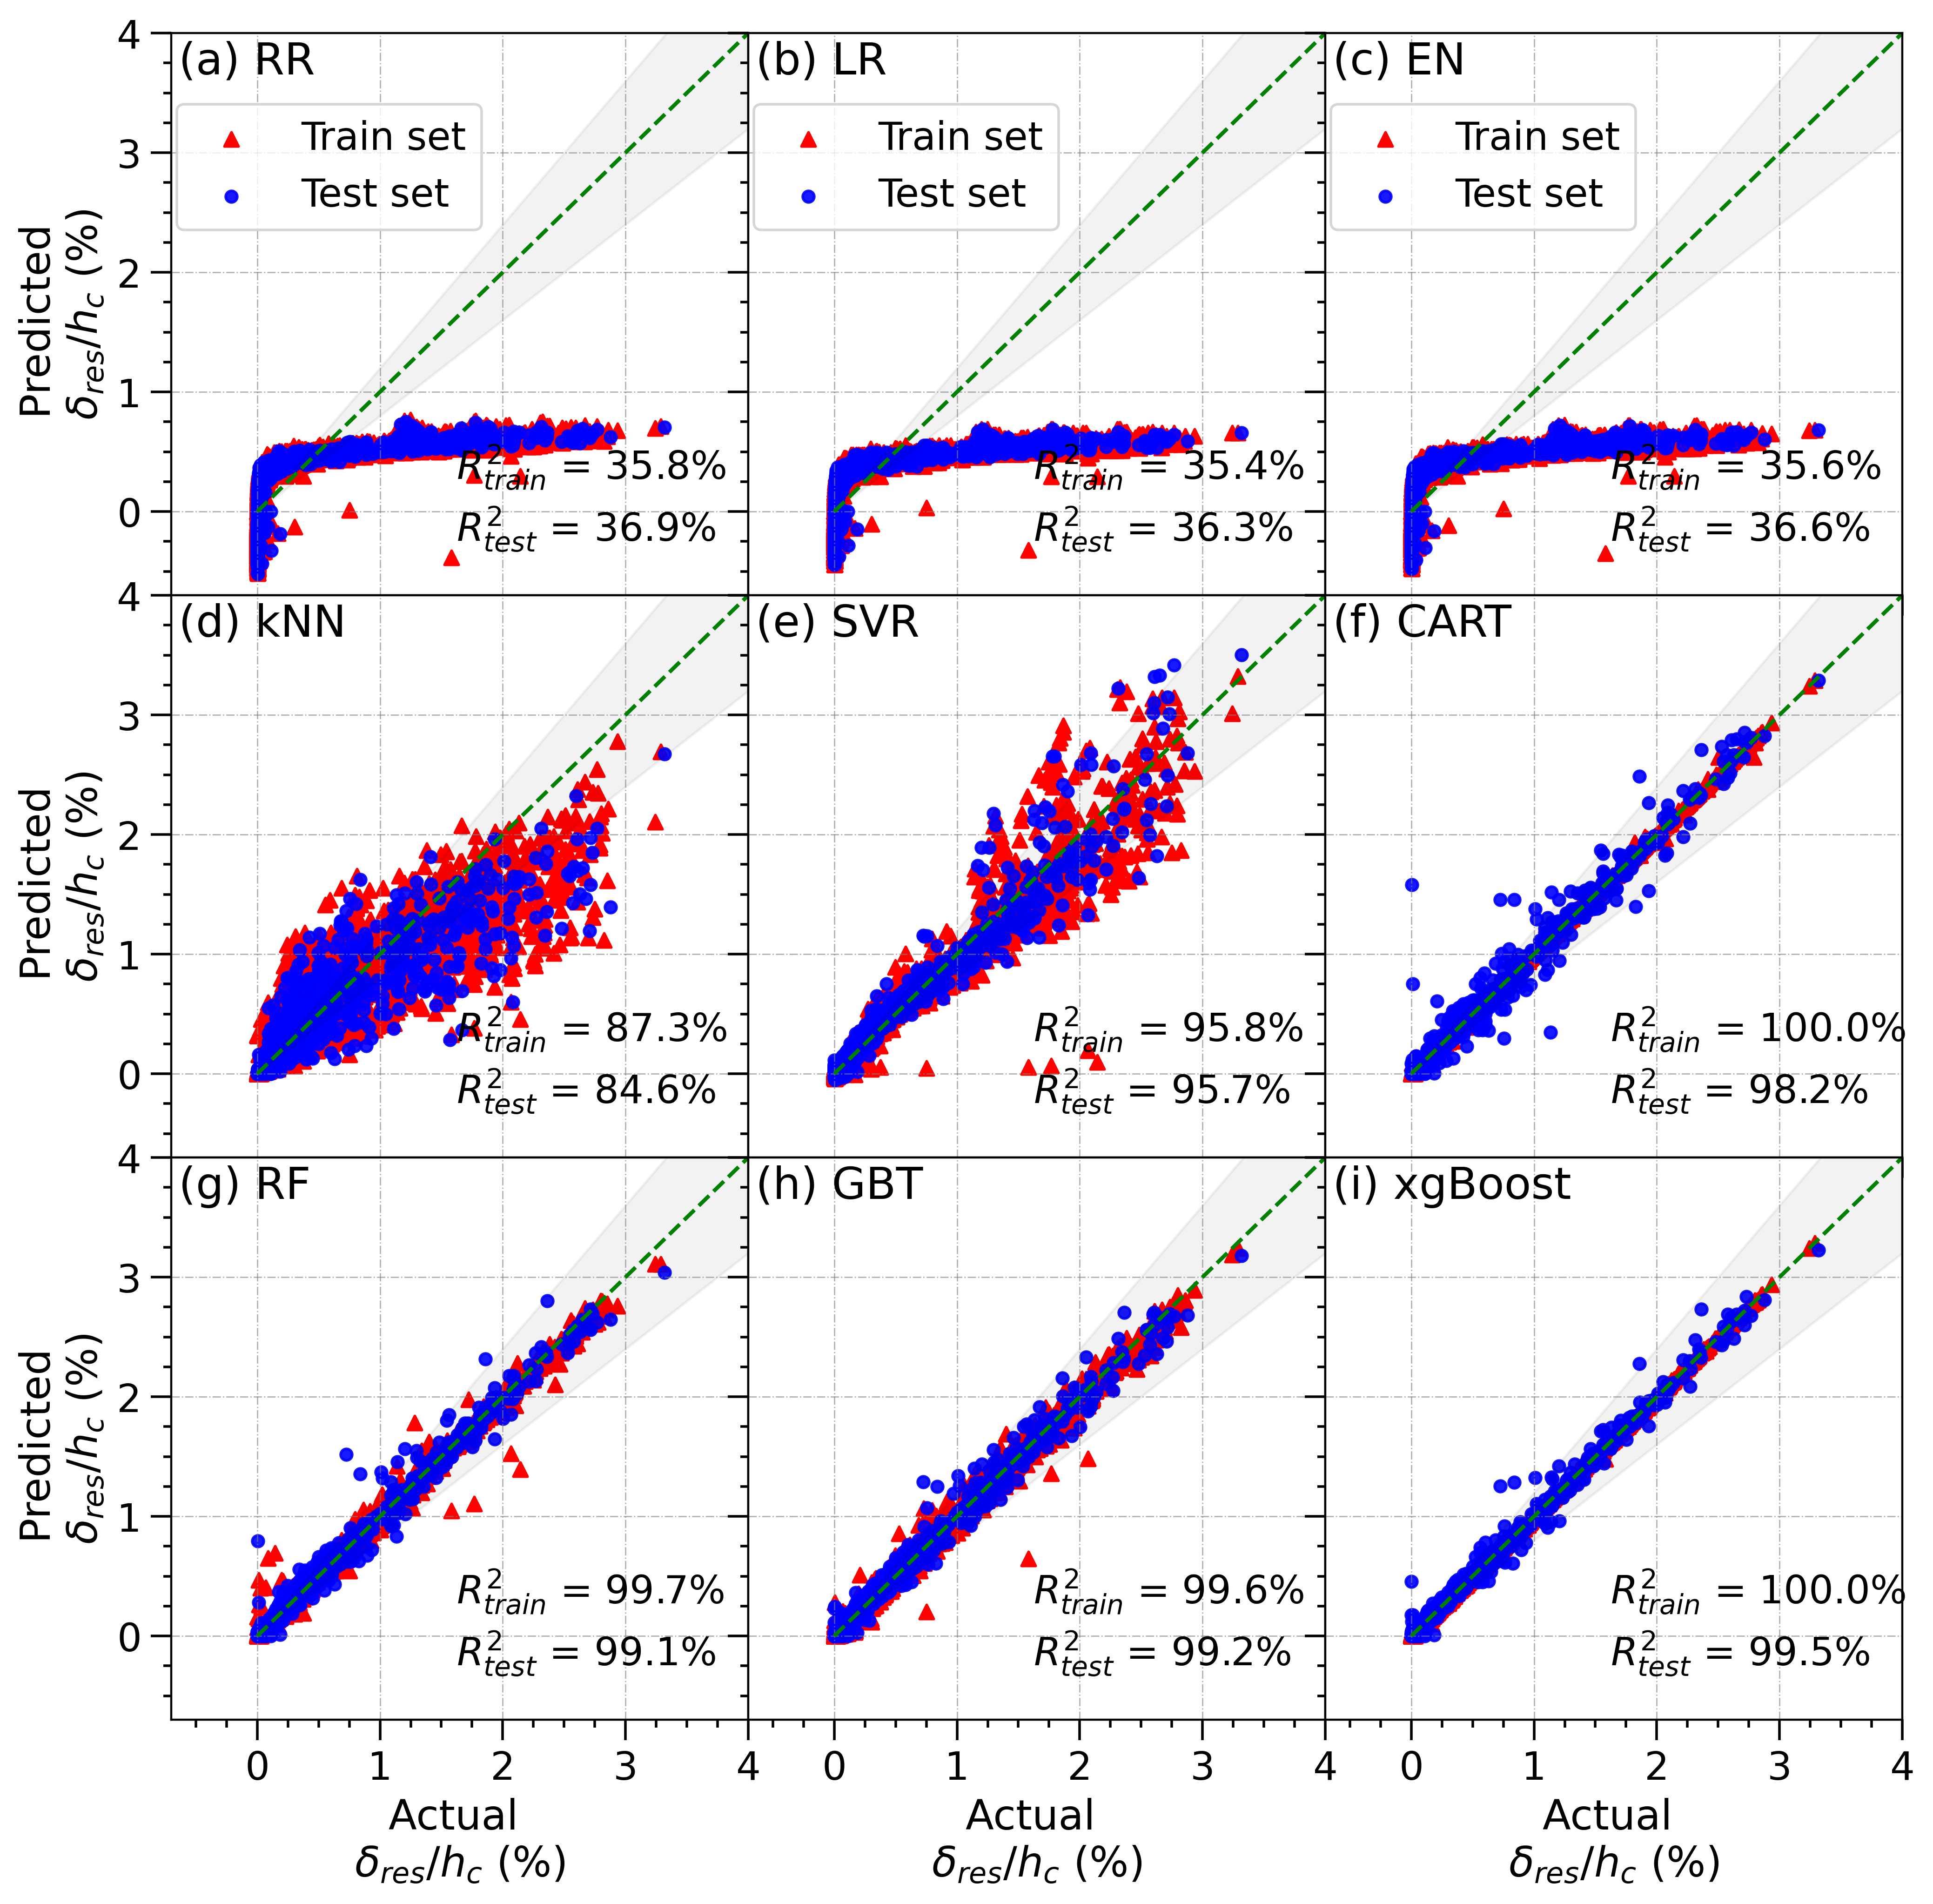

In [57]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,12))  # plot size
lm=4.0
lm1=-0.7 # minimum
fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = f*predictions_train_pd[selected_models]
  pred_test = f*predictions_test_pd[selected_models]
  ax = fig.add_subplot(3, 3, i)
  
  ax.scatter(f*y_observed_train.values, pred_train.iloc[:,i-1], 
              label="Train set", c='red', s=30, alpha=1.0,
              marker=markr[2]
              )
  ax.scatter(f*y_observed_test.values, pred_test.iloc[:,i-1], 
              label="Test set", c='blue', s=20, alpha=0.9,
              marker=markr[0]
              )
  
  plt.subplots_adjust(wspace=0., hspace=0.);  
  # change axis limit
  ax.set_xlim([lm1, lm])
  ax.set_ylim([lm1, lm])
  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  plt.xticks(rotation=0)

  plt.locator_params(axis='y', nbins=6)
  plt.locator_params(axis='x', nbins=6)


  # add legend to the first plot only
  if ((i==1) or (i==2) or (i==3)):
    ax.legend(loc=(0.01, 0.65), fontsize=15)
  # ax.legend(loc="best", fontsize=15)


  # ax.yaxis.set_major_locator(MultipleLocator(4))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))  

  # ax.xaxis.set_major_locator(MultipleLocator(4))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))

#===========-------Hide some tick labels///////////////////////////////
  if ((i==7) or (i==8) or (i==9)):
    ax.set_xlabel(xlabel, fontsize=16)
  else:    
    ax.set_xticklabels([])

  if ((i==1) or (i==4) or (i==7)):
    ax.set_ylabel(ylabel, fontsize=16)
  else: 
    # ax.set_ylabel([])
    ax.set_yticklabels([])

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.015*lm+lm1, 0.94*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='left',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            # bbox=dict(
            #     facecolor='gray', alpha=0.15,
            #     #  facecolor='None',
            #     edgecolor='black',
            # ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')

   ################# 10%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.9), 'k-.')
  # ax.plot(x, np.multiply(x, 1.1), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.9), np.multiply(x, 1.1), alpha=0.15)

  # ax.fill_between(x, np.multiply(x,1.1), np.multiply(x, 1.2), alpha=0.2)

  ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), color='black', alpha=0.05)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   
  

  ################# 20%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), alpha=0.15)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36) 

#=============================================================================================================    
  
  # add text: Display R-square in the graph:
  ax.text(0.25*lm1+0.45*lm, 0.5*lm1+0.18*lm, r'$R^2_{train}$ = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  ax.text(0.25*lm1+0.45*lm, 0.5*lm1+0.051*lm, r'$R^2_{test}$ = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  # ax.text(0.5*lm1+0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
  #           horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
# plt.savefig(path_result+'/Figures/Prediction_all_1.tiff',format='tiff', dpi=400,bbox_inches = "tight")


plt.show();

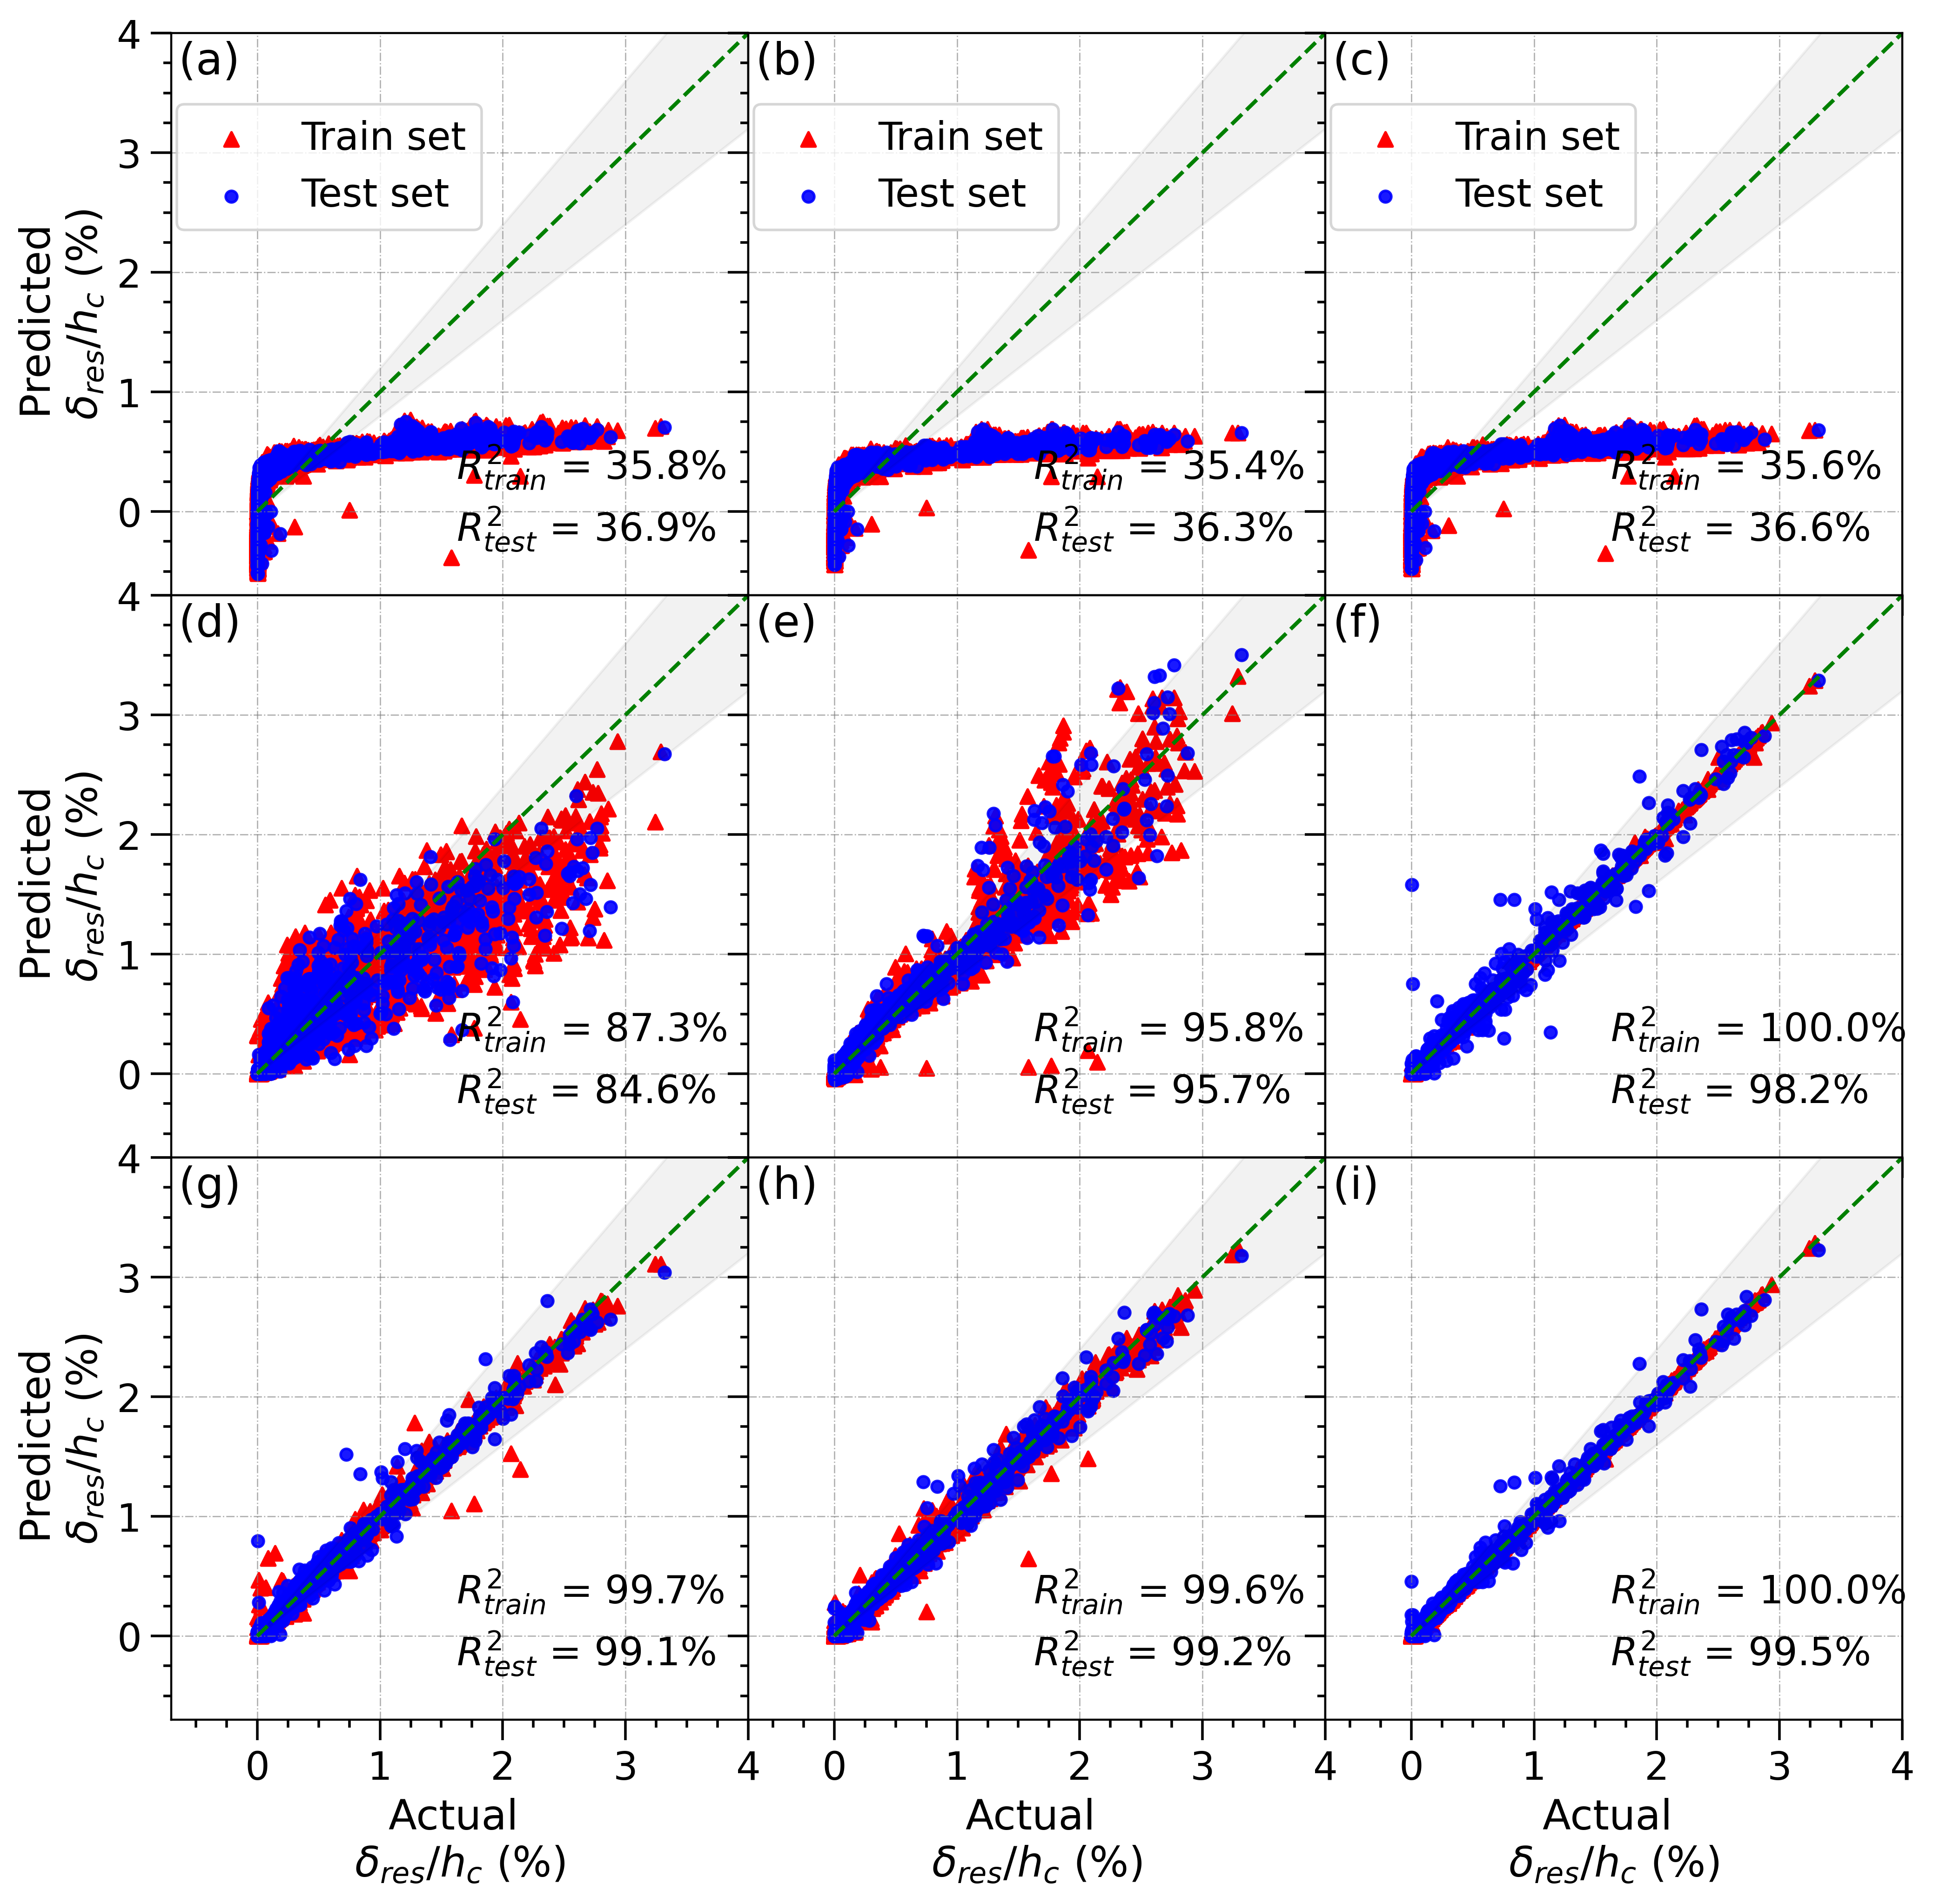

In [60]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,12))  # plot size
lm=4.0
lm1=-0.7 # minimum
fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = f*predictions_train_pd[selected_models]
  pred_test = f*predictions_test_pd[selected_models]
  ax = fig.add_subplot(3, 3, i)
  
  ax.scatter(f*y_observed_train.values, pred_train.iloc[:,i-1], 
              label="Train set", c='red', s=30, alpha=1.0,
              marker=markr[2]
              )
  ax.scatter(f*y_observed_test.values, pred_test.iloc[:,i-1], 
              label="Test set", c='blue', s=20, alpha=0.9,
              marker=markr[0]
              )
  
  plt.subplots_adjust(wspace=0., hspace=0.);  
  # change axis limit
  ax.set_xlim([lm1, lm])
  ax.set_ylim([lm1, lm])
  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  plt.xticks(rotation=0)

  plt.locator_params(axis='y', nbins=6)
  plt.locator_params(axis='x', nbins=6)


  # add legend to the first plot only
  if ((i==1) or (i==2) or (i==3)):
    ax.legend(loc=(0.01, 0.65), fontsize=15)
  # ax.legend(loc="best", fontsize=15)


  # ax.yaxis.set_major_locator(MultipleLocator(4))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))  

  # ax.xaxis.set_major_locator(MultipleLocator(4))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))

#===========-------Hide some tick labels///////////////////////////////
  if ((i==7) or (i==8) or (i==9)):
    ax.set_xlabel(xlabel, fontsize=16)
  else:    
    ax.set_xticklabels([])

  if ((i==1) or (i==4) or (i==7)):
    ax.set_ylabel(ylabel, fontsize=16)
  else: 
    # ax.set_ylabel([])
    ax.set_yticklabels([])

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.015*lm+lm1, 0.94*lm, r'(' + str(lab[i-1])+r') ',
  # +pred_train.columns[i-1], 
            horizontalalignment='left',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            # bbox=dict(
            #     facecolor='gray', alpha=0.15,
            #     #  facecolor='None',
            #     edgecolor='black',
            # ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')

   ################# 10%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.9), 'k-.')
  # ax.plot(x, np.multiply(x, 1.1), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.9), np.multiply(x, 1.1), alpha=0.15)

  # ax.fill_between(x, np.multiply(x,1.1), np.multiply(x, 1.2), alpha=0.2)

  ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), color='black', alpha=0.05)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   
  

  ################# 20%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), alpha=0.15)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36) 

#=============================================================================================================    
  
  # add text: Display R-square in the graph:
  ax.text(0.25*lm1+0.45*lm, 0.5*lm1+0.18*lm, r'$R^2_{train}$ = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  ax.text(0.25*lm1+0.45*lm, 0.5*lm1+0.051*lm, r'$R^2_{test}$ = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  # ax.text(0.5*lm1+0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
  #           horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
plt.savefig('Prediction_all_1.svg',format='svg', dpi=400,bbox_inches = "tight")


plt.show();

In [ ]:
stop here

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,12))  # plot size
lm=120
lm1=0.0 # minimum
fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(3, 3, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="Train set", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="Test set", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  plt.subplots_adjust(wspace=0., hspace=0.);  
  # change axis limit
  ax.set_xlim([lm1, lm])
  ax.set_ylim([lm1, lm])
  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  # ax.legend(loc="best", fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  plt.xticks(rotation=0)

  plt.locator_params(axis='y', nbins=5)
  plt.locator_params(axis='x', nbins=5)

  # ax.yaxis.set_major_locator(MultipleLocator(4))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))  

  # ax.xaxis.set_major_locator(MultipleLocator(4))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))

#===========-------Hide some tick labels///////////////////////////////
  if ((i==7) or (i==8) or (i==9)):
    ax.set_xlabel(xlabel, fontsize=16)
  else:    
    ax.set_xticklabels([])

  if ((i==1) or (i==4) or (i==7)):
    ax.set_ylabel(ylabel, fontsize=16)
  else: 
    # ax.set_ylabel([])
    ax.set_yticklabels([])

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.015*lm+lm1, 0.94*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='left',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            # bbox=dict(
            #     facecolor='gray', alpha=0.15,
            #     #  facecolor='None',
            #     edgecolor='black',
            # ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')

   ################# 10%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.9), 'k-.')
  # ax.plot(x, np.multiply(x, 1.1), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.9), np.multiply(x, 1.1), alpha=0.15)

  # ax.fill_between(x, np.multiply(x,1.1), np.multiply(x, 1.2), alpha=0.2)

  ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), color='black', alpha=0.05)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  # #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   
  

  ################# 20%//////////////////////////////////////////
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # ax.fill_between(x, np.multiply(x,0.8), np.multiply(x, 1.2), alpha=0.15)

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36) 

#=============================================================================================================    
  
  # add text: Display R-square in the graph:
  ax.text(0.25*lm1+0.5*lm, 0.5*lm1+0.18*lm, r'$R^2_{train}$ = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  ax.text(0.25*lm1+0.5*lm, 0.5*lm1+0.051*lm, r'$R^2_{test}$ = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='left', verticalalignment='center', fontsize=15)
  
  # ax.text(0.5*lm1+0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
  #           horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
# plt.savefig(path_result+'/Figures/Prediction_all_1.tiff',format='tiff', dpi=400,bbox_inches = "tight")


plt.show();

In [ ]:
stop here

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=2
lm1=0.5 # minimum
fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="Train set", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="Test set", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([lm1, lm])
  ax.set_ylim([lm1, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black',
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  ax.plot(x, np.multiply(x, 0.8), 'k-.')
  ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # add text: 
  x1 = 0.9*lm
  x2=0.7*lm
  x3=0.9*lm
  ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.5*lm1+0.72*lm, 0.5*lm1+0.3*lm, r'$R^2_{train}$ = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.5*lm1+0.72*lm, 0.5*lm1+0.2*lm, r'$R^2_{test}$ = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.5*lm1+0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
# plt.savefig(path_result+'/Figures/Prediction_all_1.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=350

fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="train dataset", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="test dataset", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([0, lm])
  ax.set_ylim([0, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black',
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.73*lm, 0.3*lm, r'$R^2$ (train) = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.73*lm, 0.2*lm, r'$R^2$ (test) = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
plt.savefig(path_result+'/Figures/Prediction_all_2.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();



## Single models

In [ ]:
predictions_all_pd.columns

In [ ]:
selected_models = ['kNN', 'KRR', 'SVR', 'CART']

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=350

fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="train dataset", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="test dataset", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([0, lm])
  ax.set_ylim([0, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black'
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  ax.plot(x, np.multiply(x, 0.8), 'k-.')
  ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # add text: 
  x1 = 0.9*lm
  x2=0.7*lm
  x3=0.9*lm
  ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.73*lm, 0.3*lm, r'$R^2$ (train) = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.73*lm, 0.2*lm, r'$R^2$ (test) = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
plt.savefig(path_result+'/Figures/Prediction_single_1.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();



In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=350

fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="train dataset", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="test dataset", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([0, lm])
  ax.set_ylim([0, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black',
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.73*lm, 0.3*lm, r'$R^2$ (train) = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.73*lm, 0.2*lm, r'$R^2$ (test) = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
plt.savefig(path_result+'/Figures/Prediction_single_2.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();

## Ensemble models

In [ ]:
predictions_all_pd.columns

In [ ]:
selected_models = ['RF', 'ADB', 'GBT', 'xgBoost','ngb']

In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=80

fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="train dataset", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="test dataset", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([0, lm])
  ax.set_ylim([0, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black',
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  ax.plot(x, np.multiply(x, 0.8), 'k-.')
  ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # add text: 
  x1 = 0.9*lm
  x2=0.7*lm
  x3=0.9*lm
  ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
            verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.73*lm, 0.3*lm, r'$R^2$ (train) = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.73*lm, 0.2*lm, r'$R^2$ (test) = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],1))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab
plt.savefig(path_result+'/Figures/Prediction_ensemble_1.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();



In [ ]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
plt.rcParams['figure.dpi'] = 400

plt.rcParams['axes.facecolor'] = 'white'

fig = plt.figure(figsize=(12,28))  # plot size
lm=350

fweight = 'normal'
fontsz = 20
fontsz2 = 20
line_stye = ['-', '--', '-.', ':']
markr = ['o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']
lab = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n"]
#-----------------------------------------------------------------

for i in range(1,predictions_train_pd[selected_models].shape[1]+1):
  pred_train = predictions_train_pd[selected_models]
  pred_test = predictions_test_pd[selected_models]
  ax = fig.add_subplot(5, 2, i)
  
  ax.scatter(y_observed_train.values, pred_train.iloc[:,i-1], 
              label="train dataset", c='blue', s=30, alpha=1.0,
              marker=markr[0]
              )
  ax.scatter(y_observed_test.values, pred_test.iloc[:,i-1], 
              label="test dataset", c='red', s=40, alpha=0.9,
              marker=markr[2]
              )
  
  ax.set_xlabel(xlabel, fontsize=20)
  ax.set_ylabel(ylabel, fontsize=20)
  plt.subplots_adjust(wspace=0.3, hspace=0.3);
  # change axis limit
  ax.set_xlim([0, lm])
  ax.set_ylim([0, lm])
  
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)

  ax.grid(color='gray', linestyle='-.', linewidth=0.5)

  # ax.xaxis.set_major_locator(MultipleLocator(1.000))
  ax.xaxis.set_minor_locator(AutoMinorLocator(4))
  # ax.yaxis.set_major_locator(MultipleLocator(1.000))
  ax.yaxis.set_minor_locator(AutoMinorLocator(4))

  ax.tick_params(which='major', length=8, width=1.0, 
                #  labelsize=10, 
                  labelcolor='black')
  ax.tick_params(which='minor', width=1.0, length=3, labelsize=10, labelcolor='0.25')
  
  ax.grid(linestyle="-.", linewidth=0.5, color='gray', alpha=0.6)

  #================= Use one of the following ==============================================================================  
  #---------without names---------------------------------------

  # ax.text(0.93*lm, 0.08*lm, r'(' + str(lab[i-1])+r')', horizontalalignment='center',
  #       verticalalignment='center', fontsize=fontsz2, fontweight=fweight)
  
  #---------with names---------------------------------------

  plt.text(0.98*lm, 0.058*lm, r'(' + str(lab[i-1])+r') '+pred_train.columns[i-1], 
            horizontalalignment='right',
            verticalalignment='center', 
            fontsize=17, 
            fontweight=fweight,
            bbox=dict(
                facecolor='gray', alpha=0.15,
                #  facecolor='None',
                edgecolor='black',
            ), # add box
          )
  #-----------------------------------------------------------------------------------------------

  #=============================================================================================================   
  # perfect match line
  x = [0, lm]    
  y = x
  ax.plot(x, y, '--', color='g')
  # ax.plot(x, np.multiply(x, 0.8), 'k-.')
  # ax.plot(x, np.multiply(x, 1.2), 'k-.')

  # # add text: 
  # x1 = 0.9*lm
  # x2=0.7*lm
  # x3=0.9*lm
  # ax.text(x1, x1*1.04, r'0%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=45)

  # # plt.text(x2, 1.1*x2*1.02, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=47)

  # ax.text(x2, 1.22*x2*1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=50)

  # # plt.text(x3, 0.9*x3/1.04, r'10%', horizontalalignment='center', 
  # #          verticalalignment='center', fontsize=fontsz, fontweight=fweight, rotation=40)

  # ax.text(x3, 0.78*x3/1.06, r'20%', horizontalalignment='center', 
  #           verticalalignment='center', fontsize=fontsz2, fontweight=fweight, rotation=36)   

#=============================================================================================================    
  ax.legend(loc="best", fontsize=15)
  
  # add text: Display R-square in the graph:
  ax.text(0.73*lm, 0.3*lm, r'$R^2$ (train) = '+str(round(result_train_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.73*lm, 0.2*lm, r'$R^2$ (test) = '+str(round(result_test_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)
  
  ax.text(0.3*lm, 0.7*lm, r'$R^2$ = ' + str(round(result_all_pd['R2'][pred_train.columns[i-1]],2))+'%', 
            horizontalalignment='center', verticalalignment='center', fontsize=16)  
        
# save the figure to a file
# jupyter notebook
# plt.savefig('Results/Figures/Prediction_all.tiff',format='tiff', dpi=1000,bbox_inches = "tight")

# colab 
plt.savefig(path_result+'/Figures/Prediction_ensemble_2.tiff',format='tiff', dpi=400,bbox_inches = "tight")

plt.show();



In [ ]:
Stop here Tad!

# [Feature Importances using yellow brick](https://www.scikit-yb.org/en/latest/api/model_selection/importances.html)

In [ ]:
pip install -U yellowbrick

In [ ]:
# pip install yellowbrick==0.9.1 scikit-learn==0.22.2

In [ ]:
names=X.columns

In [ ]:
from yellowbrick.model_selection import FeatureImportances

model = regr_XGB
labels = list(map(lambda s: s.title(), names))
viz = FeatureImportances(model, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(x_train, y_train)
viz.show();

# [Residual plots for all models](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)
[Yellowbrick](https://www.scikit-yb.org/en/latest/quickstart.html)

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 400
from yellowbrick.regressor import CooksDistance
from yellowbrick.regressor import ResidualsPlot

models_used = [regr_rf, regr_ADB, regr_GBR, regr_XGB]
my_title = ["Random Forest", 'AdaBoost', 
            'Gradient Boosting Regressor', "Extreme gradient boosting"]

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-notebook')

# plt.style.use('classic')

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['grid.color']='k'
plt.rcParams['axes.edgecolor']='k'

plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['lines.markersize']=8

plt.rcParams['legend.fontsize']=14
plt.rcParams['grid.linewidth']=0.5

plt.rcParams['grid.linestyle']='-.'
plt.rcParams['axes.linewidth']=1

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['axes.formatter.limits']=[-3,3]

for i in range(1,len(models_used)+1):
    model = models_used[i-1]
    visualizer_residuals = ResidualsPlot(model,
                                         fig=plt.figure(figsize=(7,4)),
                                         title=my_title[i-1],
                                         train_color='b', test_color='r',
                                         train_alpha=1.0, test_alpha=1.0,
                                         
                                        )
    visualizer_residuals.fit(x_train, y_train)
    visualizer_residuals.score(x_test, y_test)    
    visualizer_residuals.show();

visualizer_residuals.show();

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 400
from yellowbrick.regressor import CooksDistance
from yellowbrick.regressor import ResidualsPlot

models_used = [regr_rf, regr_ADB, regr_GBR, regr_XGB]
my_title = ["Random forest", 'AdaBoost', 
            'Gradient boosted trees', "xgBoost"]

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-notebook')

# plt.style.use('classic')

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['grid.color']='k'
plt.rcParams['axes.edgecolor']='k'

plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['lines.markersize']=6

plt.rcParams['legend.fontsize']=14
plt.rcParams['grid.linewidth']=0.5

plt.rcParams['grid.linestyle']='-.'
plt.rcParams['axes.linewidth']=1

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['axes.formatter.limits']=[-3,3]

for i in range(1,len(models_used)+1):
    model = models_used[i-1]
    visualizer_residuals = ResidualsPlot(model,
                                         fig=plt.figure(figsize=(7,4)),
                                         title=my_title[i-1],
                                         train_color='b', test_color='r',
                                         train_alpha=1.0, test_alpha=1.0,
                                         
                                        )
    visualizer_residuals.fit(x_train, y_train)
    visualizer_residuals.score(x_test, y_test)    
    visualizer_residuals.show();

visualizer_residuals.show();

In [ ]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.dpi'] = 400
from yellowbrick.regressor import CooksDistance
from yellowbrick.regressor import ResidualsPlot

models_used = [regr_rf, regr_ADB, regr_GBR, regr_XGB]
my_title = ["Random Forest", 'AdaBoost', 
            'Gradient Boosting Regressor', "Extreme gradient boosting"]

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-notebook')

# plt.style.use('classic')

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['grid.color']='k'
plt.rcParams['axes.edgecolor']='k'

plt.rcParams['axes.labelsize']=20
plt.rcParams['axes.titlesize']=18
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18
plt.rcParams['lines.markersize']=7

plt.rcParams['legend.fontsize']=18
plt.rcParams['grid.linewidth']=0.5

plt.rcParams['grid.linestyle']='-.'
plt.rcParams['axes.linewidth']=1

plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['font.style'] = 'normal'
# plt.rcParams['axes.formatter.limits']=[-3,3]

for i in range(1,len(models_used)+1):
    model = models_used[i-1]
    visualizer_residuals = ResidualsPlot(model,
                                         fig=plt.figure(figsize=(7,4)),
                                         title=my_title[i-1],
                                         train_color='b', test_color='r',
                                         train_alpha=1.0, test_alpha=1.0,
                                         
                                        )
    visualizer_residuals.fit(x_train, y_train)
    visualizer_residuals.score(x_test, y_test)    
    visualizer_residuals.show();

visualizer_residuals.show();

# Save the model using pickle file

In [ ]:
# import xgboost
# print(xgboost.__version__)

In [ ]:
# pip install xgboost==1.1.1

In [ ]:
# Save using pickle
import pickle
model = regr_XGB
pickle_out = open('model_res_drift_tot.pkl', 'wb')
pickle.dump(model, pickle_out)
pickle_out.close()

In [ ]:
# model5 = pickle.load(open('xgboost_model.pkl', 'rb'))
# model5

In [ ]:
# # save using joblib
# import joblib
# from joblib import dump
# from joblib import load
# joblib.dump(model, "xgboost_model.dat")

# For reliability analysis, KR parameters

In [ ]:
model = regr_XGB

#=== KR: ratio of experimental to predicted response based on the selected model

# predictions for train and test datasets
y_pred_test_1 = model.predict(x_test).flatten() # prediction for test dataset
y_pred_train_1 = model.predict(x_train).flatten() # prediction for train dataset
# Predictions for all dataset and observed values
y_pred_all_1= model.predict(X.values).flatten() # predictions for all dataset (Remember X is the input)

# Invert
yy = dataset.iloc[:,-1:].values # observed values
y_pred_all_ = yy.min()+(yy.max()-yy.min()) * y_pred_all_1 # inverted predicted values
y_pred_test_ = yy.min()+(yy.max()-yy.min()) * y_pred_test_1 
y_pred_train_ = yy.min()+(yy.max()-yy.min()) * y_pred_train_1
y_observed = yy.min()+(yy.max()-yy.min()) * Y
y_observed_train = yy.min()+(yy.max()-yy.min()) *ytrain
y_observed_test = yy.min()+(yy.max()-yy.min()) *ytest

# Mean and standard deviation of predicted to observed outputs ratio
KR = np.divide(yy, y_pred_all_.reshape(y_pred_all_.shape[0], 1))
mean_KR = round(np.mean(KR),5)
STD_KR = round(np.std(KR),5)

Bias_factor_KR = 10**np.mean(np.log10(KR))

print('Mean KR = '+str(mean_KR))
print('STD KR = '+str(STD_KR))
print('Bias Rn = '+str(Bias_factor_KR))